In [1]:
#Instalo librerias que no tiene el colab por defecto
!pip install empiricaldist
!pip install session_info

# No mostrar mensajes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import empiricaldist
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12585 sha256=4499dfe12fe65050de61ea54748b17f101821f21ea2409fe12627c449fd69850
  Stored in directory: /root/.cache/pip/wheels/ca/a9/1f/90c7a8a37ac37ff0fa0a27b2152f9b24be8910448ab93992f8
Successfully built empiricaldist
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=4e03e467947bbde40355ca6076b94325046863f28fdcaf49d17bc26b3d9fc1da
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session_info


In [2]:
# --- Cargar y explorar el conjunto de datos.

# Cargar los archivos CSV en DataFrames
df_payers = pd.read_csv("payers.csv")
df_encounters = pd.read_csv("encounters.csv")
df_organizations = pd.read_csv("organizations.csv")
df_patients = pd.read_csv("patients.csv")
df_procedures = pd.read_csv("procedures.csv")

# Realizamos una copia de seguridad
df_payers_copy = df_payers.copy()
df_encounters_copy = df_encounters.copy()
df_organizations_copy = df_organizations.copy()
df_patients_copy = df_patients.copy()
df_procedures_copy = df_procedures.copy()

# Mostrar las primeras 5 filas de cada DataFrame
print("\nPrimeras 5 filas de 'payers.csv':")
print(df_payers.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nPrimeras 5 filas de 'encounters.csv':")
print(df_encounters.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nPrimeras 5 filas de 'organizations.csv':")
print(df_organizations.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nPrimeras 5 filas de 'patients.csv':")
print(df_patients.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nPrimeras 5 filas de 'procedures.csv':")
print(df_procedures.head().to_markdown(index=False, numalign="left", stralign="left"))

# Mostrar las columnas y tipos de datos de cada DataFrame
print("\nInformación de 'payers.csv':")
print(df_payers.info())

print("\nInformación de 'encounters.csv':")
print(df_encounters.info())

print("\nInformación de 'organizations.csv':")
print(df_organizations.info())

print("\nInformación de 'patients.csv':")
print(df_patients.info())

print("\nInformación de 'procedures.csv':")
print(df_procedures.info())


Primeras 5 filas de 'payers.csv':
| Id                                   | NAME                   | ADDRESS            | CITY       | STATE_HEADQUARTERED   | ZIP   | PHONE          |
|:-------------------------------------|:-----------------------|:-------------------|:-----------|:----------------------|:------|:---------------|
| b3221cfc-24fb-339e-823d-bc4136cbc4ed | Dual Eligible          | 7500 Security Blvd | Baltimore  | MD                    | 21244 | 1-877-267-2323 |
| 7caa7254-5050-3b5e-9eae-bd5ea30e809c | Medicare               | 7500 Security Blvd | Baltimore  | MD                    | 21244 | 1-800-633-4227 |
| 7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a | Medicaid               | 7500 Security Blvd | Baltimore  | MD                    | 21244 | 1-877-267-2323 |
| d47b3510-2895-3b70-9897-342d681c769d | Humana                 | 500 West Main St   | Louisville | KY                    | 40018 | 1-844-330-7799 |
| 6e2f1a2d-27bd-3701-8d08-dae202c58632 | Blue Cross Blue Shield | Michi

In [3]:
# Identificar valores faltantes en cada DataFrame
print("\nValores faltantes en df_payers:")
print(df_payers.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nValores faltantes en df_encounters:")
print(df_encounters.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nValores faltantes en df_organizations:")
print(df_organizations.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nValores faltantes en df_patients:")
print(df_patients.isnull().sum().to_markdown(numalign="left", stralign="left"))

print("\nValores faltantes en df_procedures:")
print(df_procedures.isnull().sum().to_markdown(numalign="left", stralign="left"))

# Calcular el porcentaje de valores faltantes frente al número total de filas para cada DataFrame:
print("\nPorcentaje de valores faltantes en df_payers:")
for col in df_payers.columns:
    pct_missing = df_payers[col].isnull().sum() / len(df_payers) * 100
    print(f"{col}: {pct_missing:.2f}%")

print("\nPorcentaje de valores faltantes en df_encounters:")
for col in df_encounters.columns:
    pct_missing = df_encounters[col].isnull().sum() / len(df_encounters) * 100
    print(f"{col}: {pct_missing:.2f}%")

print("\nPorcentaje de valores faltantes en df_organizations:")
for col in df_organizations.columns:
    pct_missing = df_organizations[col].isnull().sum() / len(df_organizations) * 100
    print(f"{col}: {pct_missing:.2f}%")

print("\nPorcentaje de valores faltantes en df_patients:")
for col in df_patients.columns:
    pct_missing = df_patients[col].isnull().sum() / len(df_patients) * 100
    print(f"{col}: {pct_missing:.2f}%")

print("\nPorcentaje de valores faltantes en df_procedures:")
for col in df_procedures.columns:
    pct_missing = df_procedures[col].isnull().sum() / len(df_procedures) * 100
    print(f"{col}: {pct_missing:.2f}%")


Valores faltantes en df_payers:
|                     | 0   |
|:--------------------|:----|
| Id                  | 0   |
| NAME                | 0   |
| ADDRESS             | 1   |
| CITY                | 1   |
| STATE_HEADQUARTERED | 1   |
| ZIP                 | 1   |
| PHONE               | 1   |

Valores faltantes en df_encounters:
|                     | 0     |
|:--------------------|:------|
| Id                  | 0     |
| START               | 0     |
| STOP                | 0     |
| PATIENT             | 0     |
| ORGANIZATION        | 0     |
| PAYER               | 0     |
| ENCOUNTERCLASS      | 0     |
| CODE                | 0     |
| DESCRIPTION         | 0     |
| BASE_ENCOUNTER_COST | 0     |
| TOTAL_CLAIM_COST    | 0     |
| PAYER_COVERAGE      | 0     |
| REASONCODE          | 19541 |
| REASONDESCRIPTION   | 19541 |

Valores faltantes en df_organizations:
|         | 0   |
|:--------|:----|
| Id      | 0   |
| NAME    | 0   |
| ADDRESS | 0   |
| CITY    | 0   |


In [4]:
# Luego de analizar los datos faltantes procedo a manejarlos

# --df_payers
"""
Para el dataframe df_payers no veo la necesidad de eliminar datos faltantes ya que el mismo hace referencia a los no asegurados "NO_INSURANCE"
Relleno las varibles categoricas con el valor "Sin Informacion" y las variables numericas con 0.


Fila del dataframe payers que contiene valores faltantes:
| Id                                   | NAME         | ADDRESS   | CITY   | STATE_HEADQUARTERED   | ZIP   | PHONE   |
|:-------------------------------------|:-------------|:----------|:-------|:----------------------|:------|:--------|
| b1c428d6-4f07-31e0-90f0-68ffa6ff8c76 | NO_INSURANCE | nan       | nan    | nan                   | nan   | nan     |

"""
df_payers['ADDRESS'].fillna('Sin Informacion', inplace=True)
df_payers['CITY'].fillna('Sin Informacion', inplace=True)
df_payers['STATE_HEADQUARTERED'].fillna('Sin Informacion', inplace=True)
df_payers['ZIP'].fillna(0, inplace=True)
df_payers['PHONE'].fillna('Sin Informacion', inplace=True)

# Imprimir las primeras 105 filas de df_payers
print("\nPrimeras 10 filas de df_payers después de la imputación:")
print(df_payers.head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\nVer informacion de df_payers de la copia de seguridad para verificar:")
print(df_payers_copy.info())

print("\nVer informacion de df_payers después de la imputación:")
print(df_payers.info())


Primeras 10 filas de df_payers después de la imputación:
| Id                                   | NAME                   | ADDRESS              | CITY            | STATE_HEADQUARTERED   | ZIP   | PHONE           |
|:-------------------------------------|:-----------------------|:---------------------|:----------------|:----------------------|:------|:----------------|
| b3221cfc-24fb-339e-823d-bc4136cbc4ed | Dual Eligible          | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-877-267-2323  |
| 7caa7254-5050-3b5e-9eae-bd5ea30e809c | Medicare               | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-800-633-4227  |
| 7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a | Medicaid               | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-877-267-2323  |
| d47b3510-2895-3b70-9897-342d681c769d | Humana                 | 500 West Main St     | Louisville      | KY                    | 40018 | 1-844-330-7799  |


In [5]:
# Manejar valores faltantes
# --df_encounters

"""
Para analizar más a fondo la relación entre los valores faltantes en REASONCODE y REASONDESCRIPTION
examinaré la relación con ENCOUNTERCLASS con más detalle.
"""

# Creamos una máscara booleana para los valores faltantes en 'REASONCODE'
is_missing_reasoncode = df_encounters['REASONCODE'].isnull()

# Agrupamos por 'ENCOUNTERCLASS' y calculamos el número de valores faltantes y el número total de filas
grouped_data = df_encounters.groupby('ENCOUNTERCLASS').agg(
    Total=('ENCOUNTERCLASS', 'size'),
    Missing_REASONCODE=('ENCOUNTERCLASS', lambda x: is_missing_reasoncode[x.index].sum())
).reset_index()

# Calculamos el porcentaje de valores faltantes
grouped_data['Percentage Missing'] = (grouped_data['Missing_REASONCODE'] / grouped_data['Total']) * 100

# Imprimimos los resultados
print("\nRelación entre la clase de encuentro y los valores faltantes en REASONCODE:")
print(grouped_data.to_markdown(index=False, numalign="left", stralign="left"))


Relación entre la clase de encuentro y los valores faltantes en REASONCODE:
| ENCOUNTERCLASS   | Total   | Missing_REASONCODE   | Percentage Missing   |
|:-----------------|:--------|:---------------------|:---------------------|
| ambulatory       | 12537   | 5088                 | 40.5839              |
| emergency        | 2322    | 2012                 | 86.6494              |
| inpatient        | 1135    | 622                  | 54.8018              |
| outpatient       | 6300    | 6273                 | 99.5714              |
| urgentcare       | 3666    | 3666                 | 100                  |
| wellness         | 1931    | 1880                 | 97.3589              |


In [6]:
# Manejar valores faltantes
# --df_encounters
"""

La alta proporción de valores faltantes en ciertas categorías de ENCOUNTERCLASS
sugiere que el registro de la razón del encuentro puede depender del tipo de encuentro.

En lugar de eliminar las filas con valores faltantes en las columnas REASONCODE y REASONDESCRIPTION,
Dado que hay una relación entre ENCOUNTERCLASS y los valores faltantes, se podría imputar usando el código/descripción
más frecuente dentro de cada clase de encuentro.

"""

# Imputar REASONCODE con la moda dentro de cada ENCOUNTERCLASS, si la moda no existe asignarle 0
df_encounters['REASONCODE'] = df_encounters.groupby('ENCOUNTERCLASS')['REASONCODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))


# Imputar REASONDESCRIPTION de manera similar (usando la moda o una constante si la moda no existe)
df_encounters['REASONDESCRIPTION'] = df_encounters.groupby('ENCOUNTERCLASS')['REASONDESCRIPTION'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido"))

# Imprimir las primeras 10 filas de df_encounters
print("\nPrimeras 10 filas después de la imputación:")
print(df_encounters.head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\nVer informacion de df_encounters de la copia de seguridad para verificar:")
print(df_encounters_copy.info())

# Imprimir la información de df_encounters
print("\nInformación después de la imputación:")
print(df_encounters.info())


Primeras 10 filas después de la imputación:
| Id                                   | START                | STOP                 | PATIENT                              | ORGANIZATION                         | PAYER                                | ENCOUNTERCLASS   | CODE      | DESCRIPTION                                | BASE_ENCOUNTER_COST   | TOTAL_CLAIM_COST   | PAYER_COVERAGE   | REASONCODE   | REASONDESCRIPTION                           |
|:-------------------------------------|:---------------------|:---------------------|:-------------------------------------|:-------------------------------------|:-------------------------------------|:-----------------|:----------|:-------------------------------------------|:----------------------|:-------------------|:-----------------|:-------------|:--------------------------------------------|
| 32c84703-2481-49cd-d571-3899d5820253 | 2011-01-02T09:26:36Z | 2011-01-02T12:58:36Z | 3de74169-7f67-9304-91d4-757e0f3a14d2 | d78e84ec-30aa-3bba-

In [7]:
# Manejar valores faltantes
# --df_organizations
# No se realiza ninguna accion porque no posee valores faltantes

print("\nValores faltantes en df_organizations:")
print(df_organizations.isnull().sum().to_markdown(numalign="left", stralign="left"))


Valores faltantes en df_organizations:
|         | 0   |
|:--------|:----|
| Id      | 0   |
| NAME    | 0   |
| ADDRESS | 0   |
| CITY    | 0   |
| STATE   | 0   |
| ZIP     | 0   |
| LAT     | 0   |
| LON     | 0   |


In [8]:
# Manejar valores faltantes
# --df_patients

# Calcular el número de valores faltantes por columna
faltantes_values = df_patients.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
total_values = df_patients.shape[0]
faltantes_porcentaje = (faltantes_values / total_values) * 100

# Crear un nuevo dataframe para mostrar los resultados
df_faltantes_data = pd.DataFrame({
    'Valores faltantes': faltantes_values,
    'Porcentaje': faltantes_porcentaje
})

# Filtrar el dataframe para mostrar solo las columnas con valores faltantes
df_faltantes_data = df_faltantes_data[df_faltantes_data['Valores faltantes'] > 0]

# Imprimir el dataframe resultante
print(df_faltantes_data.to_markdown(numalign="left", stralign="left"))

|           | Valores faltantes   | Porcentaje   |
|:----------|:--------------------|:-------------|
| DEATHDATE | 820                 | 84.1889      |
| SUFFIX    | 953                 | 97.8439      |
| MAIDEN    | 588                 | 60.3696      |
| MARITAL   | 1                   | 0.102669     |
| ZIP       | 142                 | 14.5791      |


In [9]:
# Manejar valores faltantes
# --df_patients

"""
Para la variable DEATHDATE asignamos una fecha futura muy lejana para los datos faltantes y asi poder saber que estos pacientes siguen vivos
ejemplo:
  # Filtrar los datos donde 'DEATHDATE' es igual a '2200-12-31'
  pacientes_vivos = df_patients[df_patients['DEATHDATE'] == '2200-12-31']
  pacientes_muertos = df_patients[df_patients['DEATHDATE'] != '2200-12-31']

Para la variable SUFFIX, MAIDEN se imputa con valor "Desconocido"
Para la variable MARITAL lo reemplazare por la moda de la columna agrupando por GENDER y RACE
Para la variable ZIP crearemos una funcion que devuelva el codigo postal,
ya que no encontre un patron por el cual se encuentracon valores faltantes, la ciudad con mas faltantes es Boston

"""

# Imputar los valores faltantes en la columna 'DEATHDATE' con una fecha futura
df_patients['DEATHDATE'] = df_patients['DEATHDATE'].fillna('2200-12-31')

# Imputar SUFFIX, MAIDEN con valor "Desconocido"
df_patients['SUFFIX'].fillna('Desconocido', inplace=True)
df_patients['MAIDEN'].fillna('Desconocido', inplace=True)

# Reemplar la variable MARITAL faltante por la moda de la columna agrupando por GENDER y RACE
df_patients['MARITAL'].fillna(df_patients.groupby(['GENDER', 'RACE'])['MARITAL'].transform(lambda x: x.mode()[0]), inplace=True)



In [10]:
"""
Al final use la busqueda de ZIP por partir de latitud y longitud ya que al buscar por
direccion, ciudad y estado o solo por direccion no se obtuvieron resultado significativos
"""

import requests

def obtener_codigo_postal_lat_lon(latitud, longitud):
    """
    Obtiene el código postal (ZIP) a partir de latitud y longitud utilizando la API de Nominatim.

    Parámetros:
    - latitud (float): La latitud del punto.
    - longitud (float): La longitud del punto.

    Retorna:
    - El código postal como cadena o None si no se encuentra.
    """
    url = 'https://nominatim.openstreetmap.org/reverse'
    params = {
        'lat': latitud,
        'lon': longitud,
        'format': 'json',
        'addressdetails': 1
    }
    headers = {
        'User-Agent': 'obtener-codigo-postal-script'
    }

    respuesta = requests.get(url, params=params, headers=headers)

    if respuesta.status_code == 200:
        data = respuesta.json()
        address = data.get('address', {})
        codigo_postal = address.get('postcode')
        return codigo_postal
    else:
        print("Error en la consulta:", respuesta.status_code)
        return None


In [11]:
# Imputar obtener_codigo_postal_lat_lon para todas las filas de pacientes que tienen valores faltantes en la variable zip

# Iterar sobre las filas donde ZIP es nulo
for index, row in df_patients[df_patients['ZIP'].isnull()].iterrows():
  latitude = round(row['LAT'],6)
  longitude = round(row['LON'],6)
  if pd.notna(latitude) and pd.notna(longitude):
    zip_code = obtener_codigo_postal_lat_lon(latitude, longitude)
    if zip_code:
      df_patients.loc[index, 'ZIP'] = zip_code
    else:
      print(f"No se pudo obtener el código postal para la latitud {latitude} y longitud {longitude}")


No se pudo obtener el código postal para la latitud 42.366918 y longitud -70.894849
No se pudo obtener el código postal para la latitud 42.331788 y longitud -70.986003
No se pudo obtener el código postal para la latitud 42.350032 y longitud -70.97326
No se pudo obtener el código postal para la latitud 42.254895 y longitud -70.741647
No se pudo obtener el código postal para la latitud 42.251136 y longitud -70.742053
No se pudo obtener el código postal para la latitud 42.303192 y longitud -70.975028


In [12]:
# Con la funcion logramos de 142 valores faltantes para ZIP, bajarlo a solo 6 valores faltantes

print("\nValores faltantes ZIP:")
print(df_patients.query("ZIP.isnull()").to_markdown(index=False, numalign="left", stralign="left"))

# Procedemos a imputar ZIP faltantes con la moda agrupada por CITY, STATE y COUNTY ya que solo son 6 filas
df_patients['ZIP'].fillna(df_patients.groupby(['CITY', 'STATE', 'COUNTY'])['ZIP'].transform(lambda x: x.mode()[0] if not x.mode().empty else None), inplace=True)

print("\nVer informacion de df_patients de la copia de seguridad para verificar:")
print(df_patients_copy.info())

# Imprimir la información de df_patients
print("\nInformación después del manejo de faltantes:")
print(df_patients.info())


Valores faltantes ZIP:
| Id                                   | BIRTHDATE   | DEATHDATE   | PREFIX   | FIRST      | LAST          | SUFFIX      | MAIDEN      | MARITAL   | RACE   | ETHNICITY   | GENDER   | BIRTHPLACE                       | ADDRESS                    | CITY     | STATE         | COUNTY          | ZIP   | LAT     | LON      |
|:-------------------------------------|:------------|:------------|:---------|:-----------|:--------------|:------------|:------------|:----------|:-------|:------------|:---------|:---------------------------------|:---------------------------|:---------|:--------------|:----------------|:------|:--------|:---------|
| c82a8390-0ffd-9808-0834-30f484c8be6d | 1975-12-06  | 2200-12-31  | Mr.      | Barry322   | Dickinson688  | Desconocido | Desconocido | S         | white  | nonhispanic | M        | Brookline  Massachusetts  US     | 208 Kilback Hollow         | Hull     | Massachusetts | Plymouth County | nan   | 42.3669 | -70.8948 |
| f284e57a-40

In [13]:
# Manejar valores faltantes
# --df_procedures

# Calcular el número de valores faltantes por columna
faltantes_values = df_procedures.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
total_values = df_procedures.shape[0]
faltantes_porcentaje = (faltantes_values / total_values) * 100

# Crear un nuevo dataframe para mostrar los resultados
df_faltantes_data = pd.DataFrame({
    'Valores faltantes': faltantes_values,
    'Porcentaje': faltantes_porcentaje
})

# Filtrar el dataframe para mostrar solo las columnas con valores faltantes
df_faltantes_data = df_faltantes_data[df_faltantes_data['Valores faltantes'] > 0]

# Imprimir el dataframe resultante
print(df_faltantes_data.to_markdown(numalign="left", stralign="left"))


|                   | Valores faltantes   | Porcentaje   |
|:------------------|:--------------------|:-------------|
| REASONCODE        | 36945               | 77.4512      |
| REASONDESCRIPTION | 36945               | 77.4512      |


In [14]:
# Manejar valores faltantes
# --df_procedures

"""
Vamos a agrupas los datos donde REASONCODE y REASONDESCRIPTION son faltantes,
voy a contar las ocurrencias de CODE y DESCRIPTION,
calcular el porcentaje basado en el total de filas y ordenare los resultados de forma descendente
Con esto quiero ver si hay un patron en los datos faltantes por la clase de procedimiento que es
una variable que puede influir en los resultados.
"""

# Filtramos el dataframe donde REASONCODE y REASONDESCRIPTION son faltantes
faltantes_data = df_procedures[df_procedures['REASONCODE'].isnull() & df_procedures['REASONDESCRIPTION'].isnull()]

# Agrupamos por CODE y DESCRIPTION y contar las ocurrencias
datos_agrupados = faltantes_data.groupby(['CODE', 'DESCRIPTION']).size().reset_index(name='conteo_faltantes')

# Calcular el porcentaje basado en el total de filas
total_rows = len(faltantes_data)
datos_agrupados['porcentaje_faltantes'] = round((datos_agrupados['conteo_faltantes'] / total_rows) * 100, 2)

print("\nTotal de faltantes:")
print(total_rows)

# Ordenamos en orden descendente
datos_agrupados = datos_agrupados.sort_values(by='conteo_faltantes', ascending=False)

# Imprimimos el top 10 del dataframe datos_agrupados
print(datos_agrupados.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Total de faltantes:
36945
| CODE            | DESCRIPTION                                                                        | conteo_faltantes   | porcentaje_faltantes   |
|:----------------|:-----------------------------------------------------------------------------------|:-------------------|:-----------------------|
| 710824005       | Assessment of health and social care needs (procedure)                             | 4596               | 12.44                  |
| 385763009       | Hospice care (regime/therapy)                                                      | 4098               | 11.09                  |
| 454711000124102 | Depression screening using Patient Health Questionnaire Two-Item score (procedure) | 3614               | 9.78                   |
| 171207006       | Depression screening (procedure)                                                   | 3614               | 9.78                   |
| 428211000124100 | Assessment of substance use (procedure)        

In [15]:
# Manejar valores faltantes
# --df_procedures

"""
Al observar el dataframe resultante vemos que los procedimientos representan un porcentaje significativo
de los valores faltantes, lo que sugiere que la falta de información podría estar relacionada
con que ciertos procedimientos no necesitan tener informacion cargada en REASONCODE y REASONDESCRIPTION

Por este analisis decido no eliminar esos valores faltantes y asignarle a la variable categórica
'Sin Informacion' y a la variable numerica 0 de manera a mantener informacion relevante
para el analisis como lo es el codigo y la descripcion del procedimiento.

"""

# Imputar los valores faltantes en 'REASONCODE' con 'Sin Informacion'
df_procedures['REASONCODE'].fillna(0, inplace=True)

# Imputar los valores faltantes en 'REASONDESCRIPTION' con 'Sin Informacion'
df_procedures['REASONDESCRIPTION'].fillna('Sin Informacion', inplace=True)

# Imprimir las primeras 10 filas de df_procedures
print("\nPrimeras 10 filas después de la imputación:")
print(df_procedures.head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\nVer informacion de df_procedures de la copia de seguridad para verificar:")
print(df_procedures_copy.info())

# Imprimir la información de df_procedures
print("\nInformación después de la imputación:")
print(df_procedures.info())


Primeras 10 filas después de la imputación:
| START                | STOP                 | PATIENT                              | ENCOUNTER                            | CODE      | DESCRIPTION                                                            | BASE_COST   | REASONCODE   | REASONDESCRIPTION                                        |
|:---------------------|:---------------------|:-------------------------------------|:-------------------------------------|:----------|:-----------------------------------------------------------------------|:------------|:-------------|:---------------------------------------------------------|
| 2011-01-02T09:26:36Z | 2011-01-02T12:58:36Z | 3de74169-7f67-9304-91d4-757e0f3a14d2 | 32c84703-2481-49cd-d571-3899d5820253 | 265764009 | Renal dialysis (procedure)                                             | 903         | 0            | Sin Informacion                                          |
| 2011-01-03T05:44:39Z | 2011-01-03T06:01:42Z | d9ec2e44-3

In [16]:
# ---Transformar variables según sea necesario para mejorar el análisis.
# Convertimos a fechas las siguientes variables

df_encounters['START'] = pd.to_datetime(df_encounters['START'])
df_encounters['STOP'] = pd.to_datetime(df_encounters['STOP'])

df_procedures['START'] = pd.to_datetime(df_procedures['START'])
df_procedures['STOP'] = pd.to_datetime(df_procedures['STOP'])

df_patients['DEATHDATE'] = pd.to_datetime(df_patients['DEATHDATE'])
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'])


print(df_encounters.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nInformación de df_encounters después de la transformacion:")
print(df_encounters.info())

print(df_procedures.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nInformación de df_procedures después de la transformacion:")
print(df_procedures.info())

print(df_patients.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nInformación de df_patients después de la transformacion:")
print(df_patients.info())


| Id                                   | START                     | STOP                      | PATIENT                              | ORGANIZATION                         | PAYER                                | ENCOUNTERCLASS   | CODE      | DESCRIPTION                                | BASE_ENCOUNTER_COST   | TOTAL_CLAIM_COST   | PAYER_COVERAGE   | REASONCODE   | REASONDESCRIPTION                           |
|:-------------------------------------|:--------------------------|:--------------------------|:-------------------------------------|:-------------------------------------|:-------------------------------------|:-----------------|:----------|:-------------------------------------------|:----------------------|:-------------------|:-----------------|:-------------|:--------------------------------------------|
| 32c84703-2481-49cd-d571-3899d5820253 | 2011-01-02 09:26:36+00:00 | 2011-01-02 12:58:36+00:00 | 3de74169-7f67-9304-91d4-757e0f3a14d2 | d78e84ec-30aa-3bba-a33a-f29a3a4546

In [17]:
# --- Normalizar o estandarizar
# Verificamos sin no hay duplicados en la variable Id

# Verificar si hay duplicados en la columna 'Id' de cada DataFrame
print("\nDuplicados en df_payers:")
print(df_payers.duplicated(subset=['Id']).sum())

print("\nDuplicados en df_encounters:")
print(df_encounters.duplicated(subset=['Id']).sum())

print("\nDuplicados en df_organizations:")
print(df_organizations.duplicated(subset=['Id']).sum())

print("\nDuplicados en df_patients:")
print(df_patients.duplicated(subset=['Id']).sum())

# No se observan duplicados para la variable Id en los diferentes df

print("\nDuplicados en df_procedures:")
print(df_procedures.duplicated(subset=['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE']).sum())

# No se observan duplicados en df_procedures tomando las variables que podian
# formar un pk en una fila unica


Duplicados en df_payers:
0

Duplicados en df_encounters:
0

Duplicados en df_organizations:
0

Duplicados en df_patients:
0

Duplicados en df_procedures:
0


In [18]:
#Verificar valores únicos de cada variable en el dataframe df_organizations
for columna in df_organizations.columns:
  print(f"\nValores únicos en {columna}:")
  print(df_organizations[columna].unique())

# Luego de verificar no es necesario aplicar algun metodo de normalizacion o estandarizacion


Valores únicos en Id:
['d78e84ec-30aa-3bba-a33a-f29a3a454662']

Valores únicos en NAME:
['MASSACHUSETTS GENERAL HOSPITAL']

Valores únicos en ADDRESS:
['55 FRUIT STREET']

Valores únicos en CITY:
['BOSTON']

Valores únicos en STATE:
['MA']

Valores únicos en ZIP:
[2114]

Valores únicos en LAT:
[42.362813]

Valores únicos en LON:
[-71.069187]


In [19]:
#Verificar valores únicos de cada variable en el dataframe df_payers
for columna in df_payers.columns:
  print(f"\nValores únicos en {columna}:")
  print(df_payers[columna].unique())


Valores únicos en Id:
['b3221cfc-24fb-339e-823d-bc4136cbc4ed'
 '7caa7254-5050-3b5e-9eae-bd5ea30e809c'
 '7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a'
 'd47b3510-2895-3b70-9897-342d681c769d'
 '6e2f1a2d-27bd-3701-8d08-dae202c58632'
 '5059a55e-5d6e-34d1-b6cb-d83d16e57bcf'
 '4d71f845-a6a9-3c39-b242-14d25ef86a8d'
 '047f6ec3-6215-35eb-9608-f9dda363a44c'
 '42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a'
 'b1c428d6-4f07-31e0-90f0-68ffa6ff8c76']

Valores únicos en NAME:
['Dual Eligible' 'Medicare' 'Medicaid' 'Humana' 'Blue Cross Blue Shield'
 'UnitedHealthcare' 'Aetna' 'Cigna Health' 'Anthem' 'NO_INSURANCE']

Valores únicos en ADDRESS:
['7500 Security Blvd' '500 West Main St' 'Michigan Plaza'
 '9800 Healthcare Lane' '151 Farmington Ave' '900 Cottage Grove Rd'
 '220 Virginia Ave' 'Sin Informacion']

Valores únicos en CITY:
['Baltimore' 'Louisville' 'Chicago' 'Minnetonka' 'Hartford' 'Bloomfield'
 'Indianapolis' 'Sin Informacion']

Valores únicos en STATE_HEADQUARTERED:
['MD' 'KY' 'IL' 'MN' 'CT' 'IN' 'Sin Informac

In [20]:
# --- Normalizar o estandarizar
# --- df_payers
"""
Observando los valores unicos del df df_payers la variable NAME para el valor NO_INSURANCE
la podemos transformar quitando el "_" y dejando con la primera letra de cada palabra en mayuscula como los demas valores
Tambien verificamos sin no hay duplicados en la variable Id
"""
# Reemplazamos en la variable NAME utilizando el metodo replace y title de srt
df_payers['NAME'] = df_payers['NAME'].str.replace('_', ' ').str.title()

# Imprimir las primeras 10 filas de df_payers
print("\nPrimeras 10 filas después de normalizar o estandarizar:")
print(df_payers.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Primeras 10 filas después de normalizar o estandarizar:
| Id                                   | NAME                   | ADDRESS              | CITY            | STATE_HEADQUARTERED   | ZIP   | PHONE           |
|:-------------------------------------|:-----------------------|:---------------------|:----------------|:----------------------|:------|:----------------|
| b3221cfc-24fb-339e-823d-bc4136cbc4ed | Dual Eligible          | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-877-267-2323  |
| 7caa7254-5050-3b5e-9eae-bd5ea30e809c | Medicare               | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-800-633-4227  |
| 7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a | Medicaid               | 7500 Security Blvd   | Baltimore       | MD                    | 21244 | 1-877-267-2323  |
| d47b3510-2895-3b70-9897-342d681c769d | Humana                 | 500 West Main St     | Louisville      | KY                    | 40018 | 1-844-330-7799  |
|

In [21]:
#Verificar valores únicos de cada variable en el dataframe df_patients
for columna in df_patients.columns:
  print(f"\nValores únicos en {columna}:")
  print(df_patients[columna].unique())


Valores únicos en Id:
['5605b66b-e92d-c16c-1b83-b8bf7040d51f'
 '6e5ae27c-8038-7988-e2c0-25a103f01bfa'
 '8123d076-0886-9007-e956-d5864aa121a7'
 '770518e4-6133-648e-60c9-071eb2f0e2ce'
 'f96addf5-81b9-0aab-7855-d208d3d352c5'
 '8e9650d1-788a-78f9-4a28-d08f7f95354a'
 '183df435-4190-060e-8f8e-bf63c572b266'
 '720560d4-51da-c38c-ee90-c15935278df1'
 '217851b0-5f47-d376-18b9-0fe4ba77207e'
 'ff331e5c-ab16-e218-f39a-63e11de1ed75'
 'affa7bf1-f4fc-d3f7-747c-db8f32d105cf'
 'becb15c3-a135-8fb2-ea09-583043922a3a'
 'a8ceba15-ef47-da92-253d-185853ff6c34'
 '0e02b297-527d-b5ea-30e5-690c82541243'
 'f2203fd5-1a2c-60cd-cae0-1416658880b6'
 '4d55540d-c43d-e6e8-5364-ec2509df31e3'
 '07e7f8a0-1bfd-3af8-2bd0-29f1dbe9633c'
 '6746a7c0-1335-90e8-5006-04378f138f46'
 '733678d5-4ba7-d464-4eda-b849e137a42c'
 '5bd6c434-6f51-6e53-4d0f-8d3889f377da'
 'e019d0db-35d0-9bee-c8d9-76036a7f618a'
 'c249fd8d-38fa-e836-dc53-f04364e988e9'
 '19fa4e8b-62d9-0c8e-a046-33976641084b'
 '9a942ecb-92a7-4bd2-444c-f99ceebe25d0'
 'f06ef2bf-a35c-b

In [22]:
# --- Normalizar o estandarizar
# --- df_patients

"""
Luego de observar los valores unicos de las variables, se podria trabajar en
las siguientes variables:
-FIRST: contiene letras y numeros, es necesario dejarlos sin numeros
-LAST: contiene letras y numeros, es necesario dejarlos sin numeros
-RACE: dejar con la primera letra de cada palabra en mayuscula
-ETHNICITY: dejar con la primera letra de cada palabra en mayuscula y reemplazar nonhispanic por Non Hispanic
En ambas variables que alogan el nombre y el apellido contienen numeros, es necesario dejarlos
como variables categoricas y no numericas.

"""
# Aplicamos expresiones regulares para reemplazar los valores numericos en ambas cadenas
df_patients['FIRST'] = df_patients['FIRST'].str.replace('\d+', '', regex=True)
df_patients['LAST'] = df_patients['LAST'].str.replace('\d+', '', regex=True)

# Utilizamos replace y title en ambas variables
df_patients['RACE'] = df_patients['RACE'].str.title()
df_patients['ETHNICITY'] = df_patients['ETHNICITY'].str.replace('nonhispanic', 'Non Hispanic').str.title()

print("\nPrimeras 10 filas después de normalizar o estandarizar:")
print(df_patients.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Primeras 10 filas después de normalizar o estandarizar:
| Id                                   | BIRTHDATE           | DEATHDATE           | PREFIX   | FIRST   | LAST        | SUFFIX      | MAIDEN      | MARITAL   | RACE   | ETHNICITY    | GENDER   | BIRTHPLACE                        | ADDRESS                       | CITY      | STATE         | COUNTY           | ZIP   | LAT     | LON      |
|:-------------------------------------|:--------------------|:--------------------|:---------|:--------|:------------|:------------|:------------|:----------|:-------|:-------------|:---------|:----------------------------------|:------------------------------|:----------|:--------------|:-----------------|:------|:--------|:---------|
| 5605b66b-e92d-c16c-1b83-b8bf7040d51f | 1977-03-19 00:00:00 | 2200-12-31 00:00:00 | Mrs.     | Nikita  | Erdman      | Desconocido | Leannon79   | M         | White  | Non Hispanic | F        | Wakefield  Massachusetts  US      | 510 Little Station Unit 69    | Qu

In [23]:
#Verificar valores únicos de cada variable en el dataframe df_encounters
for columna in df_encounters.columns:
  print(f"\nValores únicos en {columna}:")
  print(df_encounters[columna].unique())


Valores únicos en Id:
['32c84703-2481-49cd-d571-3899d5820253'
 'c98059da-320a-c0a6-fced-c8815f3e3f39'
 '4ad28a3a-2479-782b-f29c-d5b3f41a001e' ...
 '01b57f06-cebe-a3e4-4423-a796ffb0c35d'
 '7d435668-0813-eb3b-0f26-cb741fb39561'
 '64dfd3ce-7123-fa23-ec24-f74b492553e2']

Valores únicos en START:
<DatetimeArray>
['2011-01-02 09:26:36+00:00', '2011-01-03 05:44:39+00:00',
 '2011-01-03 14:32:11+00:00', '2011-01-03 16:24:45+00:00',
 '2011-01-03 17:36:53+00:00', '2011-01-03 19:08:16+00:00',
 '2011-01-03 22:39:50+00:00', '2011-01-04 14:49:55+00:00',
 '2011-01-04 15:13:10+00:00', '2011-01-05 04:02:09+00:00',
 ...
 '2022-01-28 07:12:10+00:00', '2022-01-28 07:13:29+00:00',
 '2022-01-28 13:12:16+00:00', '2022-01-28 20:01:36+00:00',
 '2022-01-28 23:41:33+00:00', '2022-01-29 06:19:36+00:00',
 '2022-01-29 11:42:06+00:00', '2022-01-29 20:12:53+00:00',
 '2022-01-29 20:35:37+00:00', '2022-02-05 20:27:36+00:00']
Length: 27541, dtype: datetime64[ns, UTC]

Valores únicos en STOP:
<DatetimeArray>
['2011-01-02

In [24]:
# Funcion para encontrar descripciones duplicadas con el mismo codigo
def encontrar_descripciones_duplicadas(df, code_column, description_column):
    """
    Agrupa el df por 'CÓDIGO' y verifica múltiples valores únicos en 'DESCRIPCIÓN'.

    Argumentos:
        df: El DataFrame de Pandas que se analizará.
        code_column: El nombre de la columna que contiene el código.
        description_column: El nombre de la columna que contiene la descripción.

    Devuelve:
        Un diccionario con código como clave y una lista de descripciones únicas como valor
        si se encuentran varias descripciones para el mismo código.
    """

    duplicate_descriptions = {}
    grouped = df.groupby(code_column)[description_column].agg(lambda x: list(x.unique()))
    for code, descriptions in grouped.items():
        if len(descriptions) > 1:
            duplicate_descriptions[code] = descriptions

    return duplicate_descriptions


In [25]:
# Buscar duplicados descripciones duplicadas por codigo en el dataframe df_encounters
result = encontrar_descripciones_duplicadas(df_encounters, 'CODE', 'DESCRIPTION')

if result.items():
  # Imprimir resultado
  for code, descriptions in result.items():
    print(f"Code: {code} tiene multiples descripciones: {descriptions}")
else:
    print("No hay duplicados")

Code: 50849002 tiene multiples descripciones: ['Emergency Encounter', 'Emergency room admission (procedure)', 'Emergency Room Admission']
Code: 185345009 tiene multiples descripciones: ['Encounter for symptom', 'Encounter for symptom (procedure)']
Code: 185347001 tiene multiples descripciones: ['Encounter for problem (procedure)', 'Encounter for problem', 'Encounter for Problem']
Code: 185349003 tiene multiples descripciones: ['Encounter for check up (procedure)', "Encounter for 'check-up'"]
Code: 308335008 tiene multiples descripciones: ['Patient encounter procedure', 'Patient encounter procedure (procedure)']
Code: 390906007 tiene multiples descripciones: ['Follow-up encounter', 'Follow-up encounter (procedure)', 'Hypertension follow-up encounter']


In [26]:
# Reemplazamos las descripciones duplicadas por su verdadero valor segun SNOMED-CT
# https://browser.ihtsdotools.org/?perspective=full&conceptId1=404684003&edition=MAIN/2025-03-01&release=&languages=en

df_encounters.loc[df_encounters['CODE'] == 50849002, 'DESCRIPTION'] = 'Emergency room admission (procedure)'
df_encounters.loc[df_encounters['CODE'] == 185345009, 'DESCRIPTION'] = 'Encounter for symptom (procedure)'
df_encounters.loc[df_encounters['CODE'] == 185347001, 'DESCRIPTION'] = 'Encounter for problem (procedure)'
df_encounters.loc[df_encounters['CODE'] == 185349003, 'DESCRIPTION'] = 'Encounter for check up (procedure)'
df_encounters.loc[df_encounters['CODE'] == 308335008, 'DESCRIPTION'] = 'Patient encounter procedure (procedure)'
df_encounters.loc[df_encounters['CODE'] == 390906007, 'DESCRIPTION'] = 'Follow-up encounter (procedure)'

In [27]:
# Buscar duplicados REASONDESCRIPTION duplicadas por ReasonCode en el dataframe df_encounters
result = encontrar_descripciones_duplicadas(df_encounters, 'REASONCODE', 'REASONDESCRIPTION')

if result.items():
  # Imprimir resultado
  for code, descriptions in result.items():
    print(f"Code: {code} tiene multiples descripciones: {descriptions}")
else:
    print("No hay duplicados")

No hay duplicados


In [28]:
# --- Normalizar o estandarizar
# --- df_encounters

"""
Luego de observar los valores unicos de las variables, se podria estandalizar en las siguientes variables:
- ENCOUNTERCLASS
- DESCRIPTION
- REASONDESCRIPTION
No reemplazo "-" porque al buscar en internet las descripciones de los codigos poseen el guion en la descripcion
https://browser.ihtsdotools.org/?perspective=full&conceptId1=404684003&edition=MAIN/2025-03-01&release=&languages=en
"""

df_encounters['ENCOUNTERCLASS'] = df_encounters['ENCOUNTERCLASS'].str.title()
df_encounters['DESCRIPTION'] = df_encounters['DESCRIPTION'].str.title()
df_encounters['REASONDESCRIPTION'] = df_encounters['REASONDESCRIPTION'].str.title()

print("\nPrimeras 10 filas después de normalizar o estandarizar:")
print(df_encounters.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Primeras 10 filas después de normalizar o estandarizar:
| Id                                   | START                     | STOP                      | PATIENT                              | ORGANIZATION                         | PAYER                                | ENCOUNTERCLASS   | CODE      | DESCRIPTION                                | BASE_ENCOUNTER_COST   | TOTAL_CLAIM_COST   | PAYER_COVERAGE   | REASONCODE   | REASONDESCRIPTION                           |
|:-------------------------------------|:--------------------------|:--------------------------|:-------------------------------------|:-------------------------------------|:-------------------------------------|:-----------------|:----------|:-------------------------------------------|:----------------------|:-------------------|:-----------------|:-------------|:--------------------------------------------|
| 32c84703-2481-49cd-d571-3899d5820253 | 2011-01-02 09:26:36+00:00 | 2011-01-02 12:58:36+00:00 | 3de74169-7f67-93

In [29]:
#Verificar valores únicos de cada variable en el dataframe df_procedures
for columna in df_procedures.columns:
  print(f"\nValores únicos en {columna}:")
  print(df_procedures[columna].unique())


Valores únicos en START:
<DatetimeArray>
['2011-01-02 09:26:36+00:00', '2011-01-03 05:44:39+00:00',
 '2011-01-04 14:49:55+00:00', '2011-01-05 04:02:09+00:00',
 '2011-01-05 12:58:36+00:00', '2011-01-06 18:12:41+00:00',
 '2011-01-07 21:02:09+00:00', '2011-01-07 22:39:45+00:00',
 '2011-01-08 16:42:36+00:00', '2011-01-09 16:11:28+00:00',
 ...
 '2022-01-26 16:58:48+00:00', '2022-01-27 01:31:03+00:00',
 '2022-01-27 02:26:41+00:00', '2022-01-27 02:46:05+00:00',
 '2022-01-28 07:13:29+00:00', '2022-01-28 13:12:16+00:00',
 '2022-01-28 20:01:36+00:00', '2022-01-29 11:42:06+00:00',
 '2022-01-29 20:12:53+00:00', '2022-01-29 20:35:37+00:00']
Length: 39251, dtype: datetime64[ns, UTC]

Valores únicos en STOP:
<DatetimeArray>
['2011-01-02 12:58:36+00:00', '2011-01-03 06:01:42+00:00',
 '2011-01-04 15:04:55+00:00', '2011-01-05 04:17:09+00:00',
 '2011-01-05 16:42:36+00:00', '2011-01-06 18:17:12+00:00',
 '2011-01-07 22:39:45+00:00', '2011-01-07 23:00:45+00:00',
 '2011-01-08 20:15:36+00:00', '2011-01-09 16

In [30]:
## --- Normalizar o estandarizar
# df_procedures
# Buscar duplicados REASONDESCRIPTION duplicadas por ReasonCode en el dataframe df_procedures
result = encontrar_descripciones_duplicadas(df_procedures, 'REASONCODE', 'REASONDESCRIPTION')

if result.items():
  # Imprimir resultado
  for code, descriptions in result.items():
    print(f"Code: {code} tiene multiples descripciones: {descriptions}")
else:
    print("No hay duplicados")

No hay duplicados


In [31]:
# Buscar duplicados DESCRIPTION duplicadas por CODE en el dataframe df_procedures
result = encontrar_descripciones_duplicadas(df_procedures, 'CODE', 'DESCRIPTION')

if result.items():
  # Imprimir resultado
  for code, descriptions in result.items():
    print(f"Code: {code} tiene multiples descripciones: {descriptions}")
else:
    print("No hay duplicados")

Code: 5880005 tiene multiples descripciones: ['Physical examination', 'Physical examination following birth', 'Physical examination of mother', 'Physical exam following abortion']
Code: 90226004 tiene multiples descripciones: ['Cytopathology procedure  preparation of smear  genital source (procedure)', 'Cytopathology procedure  preparation of smear  genital source']
Code: 171207006 tiene multiples descripciones: ['Depression screening (procedure)', 'Depression screening']
Code: 399208008 tiene multiples descripciones: ['Plain chest X-ray (procedure)', 'Chest X-ray']


In [32]:
# Reemplazamos las descripciones duplicadas por su verdadero valor segun SNOMED-CT
# https://browser.ihtsdotools.org/?perspective=full&conceptId1=404684003&edition=MAIN/2025-03-01&release=&languages=en

df_procedures.loc[df_procedures['CODE'] == 5880005, 'DESCRIPTION'] = ' Physical examination procedure (procedure)'
df_procedures.loc[df_procedures['CODE'] == 90226004, 'DESCRIPTION'] = 'Cytopathology procedure, preparation of smear, genital source (procedure)'
df_procedures.loc[df_procedures['CODE'] == 171207006, 'DESCRIPTION'] = 'Depression screening (procedure)'
df_procedures.loc[df_procedures['CODE'] == 399208008, 'DESCRIPTION'] = 'Plain X-ray of chest (procedure)'

In [33]:
# Verifico informacion de df_procedures
print(df_procedures.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47701 entries, 0 to 47700
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   START              47701 non-null  datetime64[ns, UTC]
 1   STOP               47701 non-null  datetime64[ns, UTC]
 2   PATIENT            47701 non-null  object             
 3   ENCOUNTER          47701 non-null  object             
 4   CODE               47701 non-null  int64              
 5   DESCRIPTION        47701 non-null  object             
 6   BASE_COST          47701 non-null  int64              
 7   REASONCODE         47701 non-null  float64            
 8   REASONDESCRIPTION  47701 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(4)
memory usage: 3.3+ MB
None


In [34]:
# --- Normalizar o estandarizar
# --- df_encounters

"""
Luego de observar los valores unicos de las variables, se podria estandalizar en las siguientes variables:
- DESCRIPTION: dejar con la primera letra de cada palabra en mayuscula
- REASONDESCRIPTION: dejar con la primera letra de cada palabra en mayuscula
No reemplazo "-" porque al buscar en internet las descripciones de los codigos poseen el guion en la descripcion
Tambien se observa valores en la variable CODE que son muy grandes en cantidad se verifica en el sitio y son validos
https://browser.ihtsdotools.org/?perspective=full&conceptId1=404684003&edition=MAIN/2025-03-01&release=&languages=en
"""

# Estandarizar aplicando title a las variables categoricas seleccionadas
df_procedures['DESCRIPTION'] = df_procedures['DESCRIPTION'].str.title()
df_procedures['REASONDESCRIPTION'] = df_procedures['REASONDESCRIPTION'].str.title()

print("\nPrimeras 10 filas después de normalizar o estandarizar:")
print(df_procedures.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Primeras 10 filas después de normalizar o estandarizar:
| START                     | STOP                      | PATIENT                              | ENCOUNTER                            | CODE      | DESCRIPTION                                                            | BASE_COST   | REASONCODE   | REASONDESCRIPTION                                        |
|:--------------------------|:--------------------------|:-------------------------------------|:-------------------------------------|:----------|:-----------------------------------------------------------------------|:------------|:-------------|:---------------------------------------------------------|
| 2011-01-02 09:26:36+00:00 | 2011-01-02 12:58:36+00:00 | 3de74169-7f67-9304-91d4-757e0f3a14d2 | 32c84703-2481-49cd-d571-3899d5820253 | 265764009 | Renal Dialysis (Procedure)                                             | 903         | 0            | Sin Informacion                                          |
| 2011-01-03 05:

In [35]:
# Fase 2: Análisis Exploratorio y Estadístico
# Analizar las características de cada variable (tipos, distribuciones, estadísticas descriptivas, frecuencias, porcentajes)
# df_patients

# Información general del DataFrame
print("\nInformación general:")
print(df_patients.info())

# Tipos de datos
print("\n-------------------------------------------------------------------------")
print("Tipos de datos en df_patients:")
print(df_patients.dtypes)

print("\n-------------------------------------------------------------------------")
# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas (variables numéricas) - df_patients:")
print(df_patients.describe().to_markdown(numalign="left", stralign="left"))

print("\n-------------------------------------------------------------------------")
# Obtener todas las columnas categóricas
columnas_categoricas = df_patients.select_dtypes(include=['object', 'datetime64']).columns

# Iterar a través de cada columna categórica y calcular los conteos de valores y porcentajes para los 10 valores principales
for columna in columnas_categoricas:
  # Filtramos las columnas categoricas de mayor relevancia
  if columna not in ('Id', 'BIRTHDATE','ADDRESS', 'FIRST', 'LAST','ZIP', 'LAT', 'LON' ):
    # Obtener los conteos de valores para la columna actual
    conteos = df_patients[columna].value_counts()

    # Calcular los porcentajes (redondeamos a 2)
    porcentajes = round(df_patients[columna].value_counts(normalize=True) * 100, 2)

    # Imprimir distribucion de la columna
    print(f'\nDistribución de la columna: {columna}\n')

    # Concatenar los conteos y los porcentajes
    tablaAux = pd.concat([conteos, porcentajes], axis=1)

    # Renombrar las columnas
    tablaAux.columns = ['conteos', 'porcentajes']

    # Imprimir la tabla con los 10 valores principales
    print(tablaAux.head(10).to_markdown(numalign="left", stralign="left"))


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          974 non-null    object        
 1   BIRTHDATE   974 non-null    datetime64[ns]
 2   DEATHDATE   974 non-null    datetime64[ns]
 3   PREFIX      974 non-null    object        
 4   FIRST       974 non-null    object        
 5   LAST        974 non-null    object        
 6   SUFFIX      974 non-null    object        
 7   MAIDEN      974 non-null    object        
 8   MARITAL     974 non-null    object        
 9   RACE        974 non-null    object        
 10  ETHNICITY   974 non-null    object        
 11  GENDER      974 non-null    object        
 12  BIRTHPLACE  974 non-null    object        
 13  ADDRESS     974 non-null    object        
 14  CITY        974 non-null    object        
 15  STATE       974 non-null    object        
 16  COUN

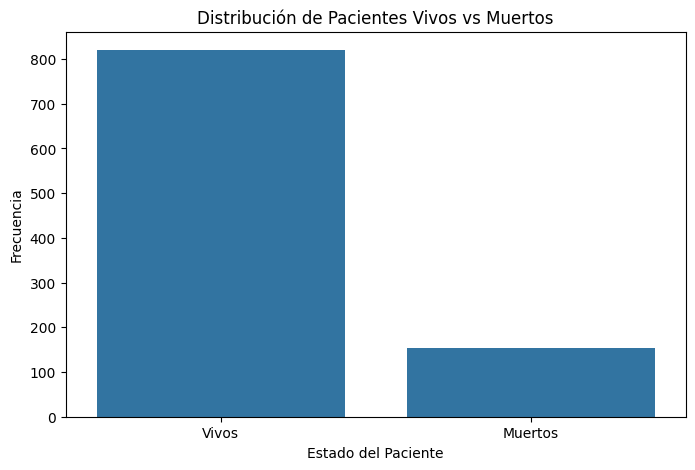

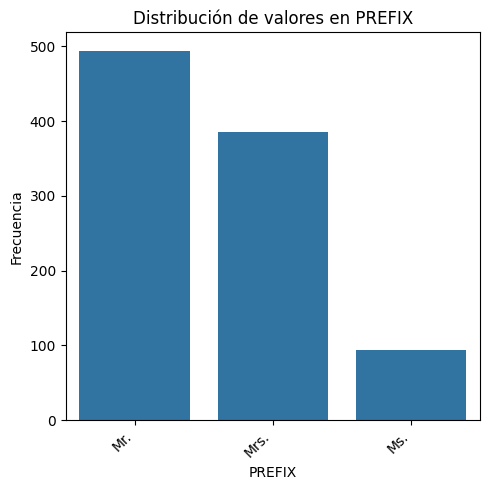

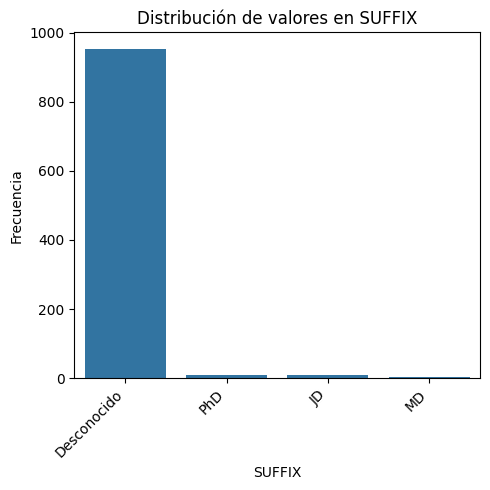

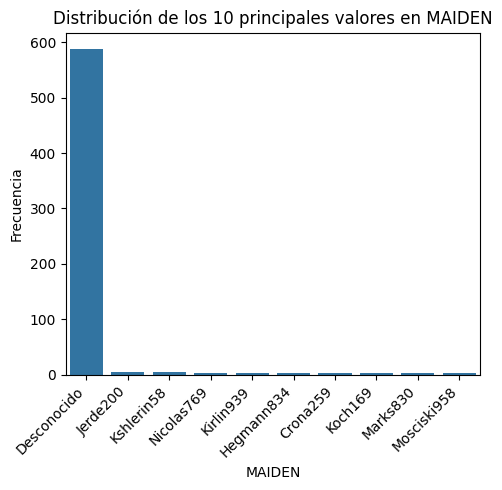

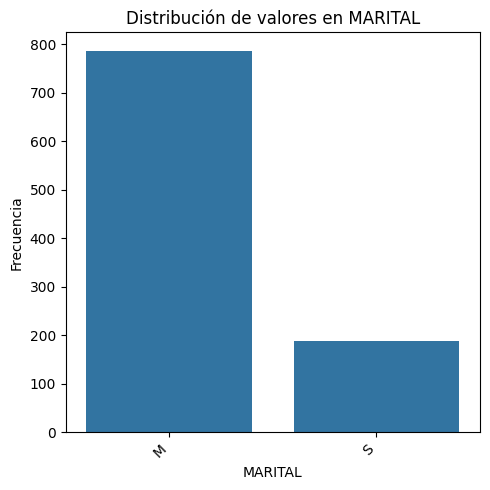

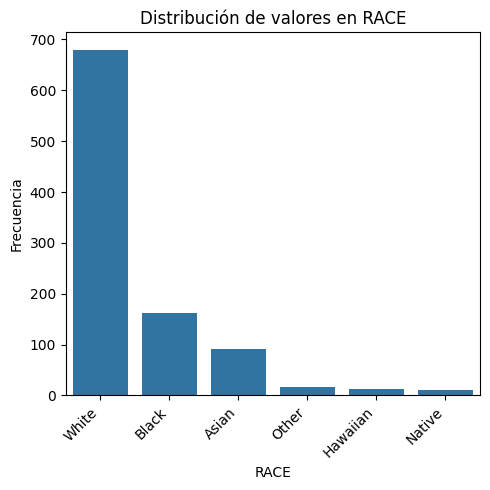

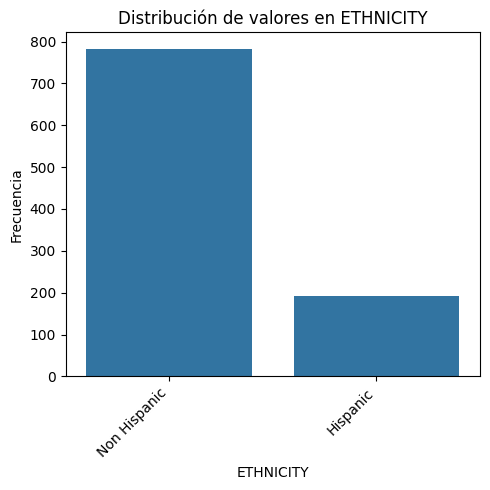

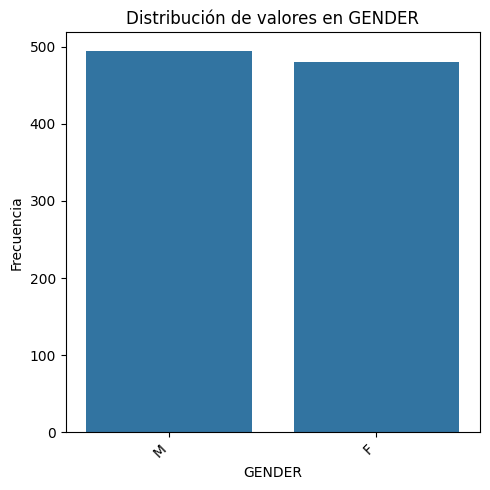

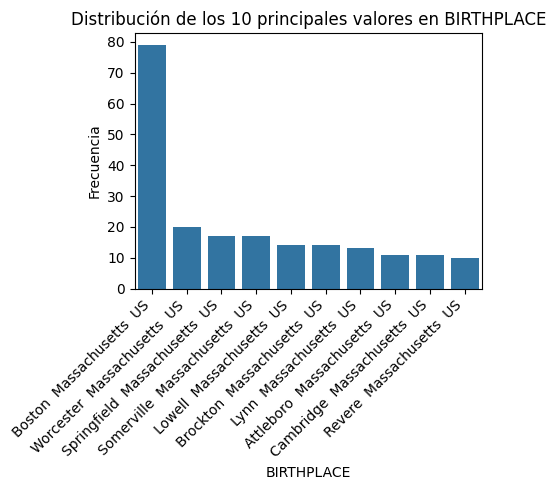

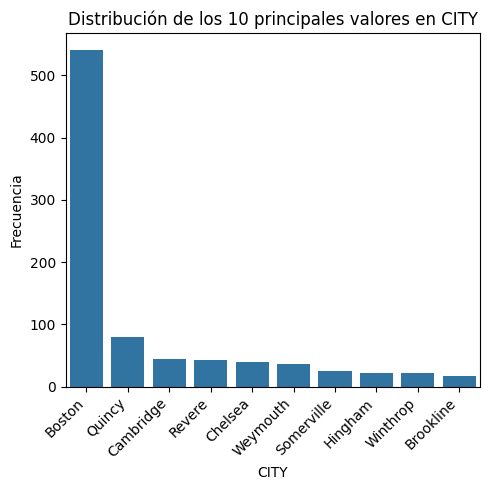

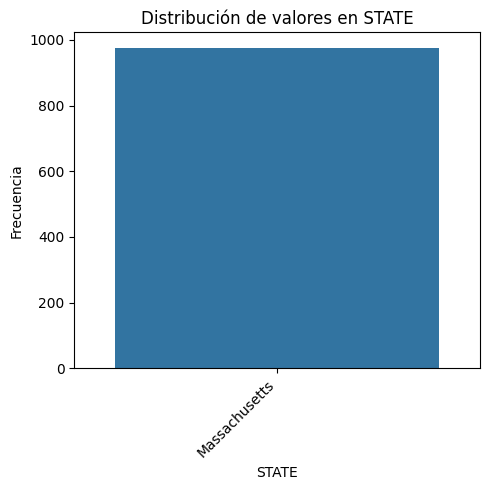

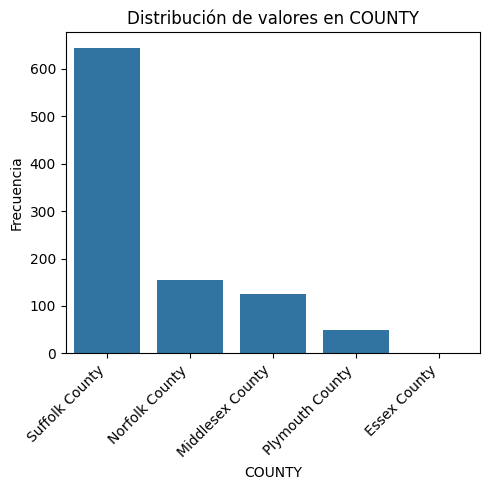

In [36]:
"""
df_patients

****En este dataframe no tenemos mucho que analisar para las variables numericas ya que no hay valores atípicos****

****Aquí están los resultados de la Interpretación del análisis de las variables categóricas mas relevantes:****

    DEATHDATE:
        La mayoría de los registros (84.19%) tienen la fecha de defunción establecida en '2200-12-31' (valor por defecto para los vivos),
        lo que indica que la mayoria de los pacientes que aún están vivos.

    PREFIX:
        Los prefijos estan distribuido de la siguiente manera:
          -'Mr.' (50.72%)
          -'Mrs.' (39.63%)
          -'Ms.' (9.65%)
          La mayoria es esta dada por señores, señoras y por ultimo solteros

    SUFFIX:
        La gran mayoría de los registros (97.84%) tienen el sufijo 'Desconocido', lo que sugiere que la información del sufijo
        no está disponible o no se registra comúnmente; seguido por PhD (1.03%), JD (0.82%) y MD con (0.31%)

    MAIDEN:
        La mayoría de los registros (60.37%) tienen el apellido de soltera como 'Desconocido',
        lo que indica que esta información a menudo no se conoce o no se proporciona.

    MARITAL:
        La mayoría de los pacientes están casados ('M', 80.60%), mientras que una minoría son solteros ('S', 19.40%).

    RACE:
        La raza más común es 'Blanca' (69.82%), seguida de 'Negra' (16.74%) y 'Asiática' (9.34%).

    ETHNICITY:
        La mayoría de los pacientes no son hispanos (80.39%), mientras que el 19.61% son hispanos.

    GENDER:
        La distribución de género es casi uniforme, con un 50.72% de pacientes masculinos ('M') y un 49.28% de pacientes femeninos ('F').

    BIRTHPLACE:
        La mayoría de los pacientes nacieron en 'Boston Massachusetts US' (8.11%), lo que sugiere una concentración de pacientes de esta área;
        seguido con un % menor por 'Worcester  Massachusetts  US' (2.05%) y 'Springfield  Massachusetts  US' (1.75%)

    CITY:
        La mayoría de los pacientes viven en 'Boston' (55.54%), lo que indica una alta concentración de pacientes en esta ciudad.

    STATE:
        Todos los pacientes son del estado de 'Massachusetts' (100%).

    COUNTY:
        La mayoría de los pacientes viven en el 'Condado de Suffolk' (66.12%), seguido del 'Condado de Norfolk' (15.91%)
        y el 'Condado de Middlesex' (12.83%).
"""

#----- gráficos de barras para facilitar la visualización de las frecuencias de valores

## --Histograma para DEATHDATE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna 'DEATHDATE_GROUPED'
df_patients['DEATHDATE_GROUPED'] = df_patients['DEATHDATE'].apply(lambda x: 'Vivos' if x == pd.to_datetime('2200-12-31') else 'Muertos')

# Calcular los conteos de 'DEATHDATE_GROUPED'
conteos_deathdate = df_patients['DEATHDATE_GROUPED'].value_counts()

# Crear el histograma para 'DEATHDATE_GROUPED'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_patients, x='DEATHDATE_GROUPED')
plt.title('Distribución de Pacientes Vivos vs Muertos')
plt.xlabel('Estado del Paciente')
plt.ylabel('Frecuencia')
plt.show()

#-------------------------------------------------------------------------------------------------
# Histogramas para todas las demas variables relevantes
# Obtener todas las columnas categóricas
columnas_categoricas = df_patients.select_dtypes(include=['object']).columns

# Excluir las columnas especificadas
columnas_a_excluir = ['Id', 'DEATHDATE', 'BIRTHDATE', 'ADDRESS', 'FIRST', 'LAST', 'ZIP', 'LAT', 'LON', 'DEATHDATE_GROUPED']
columnas_categoricas = columnas_categoricas.drop(columnas_a_excluir, errors='ignore')

# Crear histogramas para cada columna categórica
for columna in columnas_categoricas:
  # Obtener los conteos de valores para la columna actual
  conteos = df_patients[columna].value_counts()

  # Si hay demasiados valores únicos, mostrar solo los 10 principales
  if len(conteos) > 10:
    conteos = conteos.head(10)
    plt.figure(figsize=(5, 5))
    plt.title(f'Distribución de los 10 principales valores en {columna}')
  else:
    plt.figure(figsize=(5, 5))
    plt.title(f'Distribución de valores en {columna}')
  sns.barplot(x=conteos.index, y=conteos.values)
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
  plt.tight_layout()
  plt.show()

In [37]:
# Fase 2: Análisis Exploratorio y Estadístico
# Analizar las características de cada variable (tipos, distribuciones, estadísticas descriptivas, frecuencias, porcentajes)
# df_encounters

# Información general del DataFrame
print("\nInformación general df_encounters:")
print(df_encounters.info())

# Tipos de datos
print("\n-------------------------------------------------------------------------")
print("Tipos de datos en df_encounters:")
print(df_encounters.dtypes)

print("\n-------------------------------------------------------------------------")
# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas (variables numéricas) - df_encounters:")
print(df_encounters.describe().to_markdown(numalign="left", stralign="left"))

print("\n-------------------------------------------------------------------------")
# Obtener todas las columnas categóricas
columnas_categoricas = df_encounters.select_dtypes(include=['object']).columns

# Iterar a través de cada columna categórica y calcular los conteos de valores y porcentajes para los 10 valores principales
for columna in columnas_categoricas:
  # Filtramos las columnas categoricas de mayor relevancia
  if columna not in ('Id'):
    # Obtener los conteos de valores para la columna actual
    conteos = df_encounters[columna].value_counts()

    # Calcular los porcentajes (redondeamos a 2)
    porcentajes = round(df_encounters[columna].value_counts(normalize=True) * 100, 2)

    # Imprimir distribucion de la columna
    print(f'\nDistribución de la columna: {columna}\n')

    # Concatenar los conteos y los porcentajes
    tablaAux = pd.concat([conteos, porcentajes], axis=1)

    # Renombrar las columnas
    tablaAux.columns = ['conteos', 'porcentajes']

    # Imprimir la tabla con los 10 valores principales
    print(tablaAux.head(10).to_markdown(numalign="left", stralign="left"))


Información general df_encounters:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Id                   27891 non-null  object             
 1   START                27891 non-null  datetime64[ns, UTC]
 2   STOP                 27891 non-null  datetime64[ns, UTC]
 3   PATIENT              27891 non-null  object             
 4   ORGANIZATION         27891 non-null  object             
 5   PAYER                27891 non-null  object             
 6   ENCOUNTERCLASS       27891 non-null  object             
 7   CODE                 27891 non-null  int64              
 8   DESCRIPTION          27891 non-null  object             
 9   BASE_ENCOUNTER_COST  27891 non-null  float64            
 10  TOTAL_CLAIM_COST     27891 non-null  float64            
 11  PAYER_COVERAGE       27891 non-null  float64

In [38]:
"""
***Interpretación de las Estadísticas Descriptivas:
***Explicación General:

    Media: El promedio de los valores. Es útil para entender el valor central típico, pero puede ser influenciado por valores atípicos.
    Desviación Estándar: Mide la dispersión o variabilidad de los valores alrededor de la media. Una alta desviación estándar indica que los valores están más dispersos.
    Mínimo: El valor más bajo en el conjunto de datos.
    Cuartiles: Dividen los datos en cuatro partes iguales. El 25% (Q1) es el valor por debajo del cual cae el 25% de los datos, el 50% (mediana o Q2) es el valor central, y el 75% (Q3) es el valor por debajo del cual cae el 75% de los datos.
    Máximo: El valor más alto en el conjunto de datos.



***BASE_ENCOUNTER_COST (Costo Base del Encuentro):****
    Media (Mean): 116.18
        El costo base promedio de un encuentro es de 116.18 USD. Esto representa el costo estándar o fundamental asociado a la prestación del servicio médico antes de considerar reclamaciones adicionales.
    Desviación Estándar (std): 28.41
        La desviación estándar es relativamente baja en comparación con la media, lo que indica que los costos base de los encuentros tienden a estar bastante agrupados alrededor de la media. Esto sugiere que hay una variabilidad limitada en los costos base.
    Mínimo (min): 85.55
        El costo base más bajo de un encuentro es de 85.55 USD.
    Cuartiles (25%, 50%, 75%):
        25% (Q1): 85.55
        50% (Mediana): 136.8
        75% (Q3): 142.58
        El 25% de los encuentros tienen un costo base de 85.55 (que es el mínimo), lo que sugiere que una gran proporción de los encuentros tienen el costo base mínimo. La mediana (136.8) es mayor que la media, lo que implica que la distribución está sesgada a la izquierda. El 75% de los encuentros tienen un costo base de 142.58.
    Máximo (max): 146.18
        El costo base más alto de un encuentro es de 146.18 USD. El rango entre el mínimo y el máximo es pequeño, lo que confirma la baja variabilidad.

***TOTAL_CLAIM_COST (Costo Total de la Reclamación):***
    Media (Mean): 3639.68
        El costo total promedio de las reclamaciones es de 3639.68 USD. Este valor es significativamente mayor que el costo base del encuentro, lo que indica que las reclamaciones pueden añadir una cantidad considerable al costo inicial.
    Desviación Estándar (std): 9205.6
        La desviación estándar es muy alta en comparación con la media, lo que indica una gran variabilidad en los costos totales de las reclamaciones. Esto sugiere que algunos encuentros tienen reclamaciones muy altas, lo que influye en la dispersión de los datos.
    Mínimo (min): 0
        El costo total de reclamación más bajo es de 0 USD, lo que significa que algunos encuentros no tienen reclamaciones.
    Cuartiles (25%, 50%, 75%):
        25% (Q1): 142.58
        50% (Mediana): 278.58
        75% (Q3): 1412.53
        El 25% de los encuentros tienen un costo de reclamación de 142.58. La mediana (278.58) es mucho menor que la media, lo que indica que la distribución está fuertemente sesgada a la derecha. El 75% de los encuentros tienen un costo de reclamación de 1412.53.
    Máximo (max): 641883
        El costo total de reclamación más alto es de 641883 USD. Este valor extremo confirma la presencia de valores atípicos que elevan la media y la desviación estándar.

***PAYER_COVERAGE (Cobertura del Pagador):***
    Media (Mean): 1114.97
        La cobertura promedio del pagador es de 1114.97 USD. Esto representa la cantidad promedio que los pagadores (como aseguradoras) cubren de los costos.
    Desviación Estándar (std): 4768.62
        La desviación estándar es alta en comparación con la media, lo que indica una gran variabilidad en la cobertura del pagador.
    Mínimo (min): 0
        La cobertura del pagador más baja es de 0 USD, lo que significa que en algunos casos los pagadores no cubren ningún costo.
    Cuartiles (25%, 50%, 75%):
        25% (Q1): 0
        50% (Mediana): 28.44
        75% (Q3): 155.77
        El 25% de los encuentros no tienen cobertura del pagador. La mediana (28.44) es mucho menor que la media, lo que indica que la distribución está fuertemente sesgada a la derecha. El 75% de los encuentros tienen una cobertura de 155.77.
    Máximo (max): 247751
        La cobertura del pagador más alta es de 247751 USD, lo que muestra la presencia de valores atípicos.



En resumen, el análisis de estas variables revela que los costos de reclamación y la cobertura del pagador
tienen una alta variabilidad y están sesgados a la derecha, con la presencia de valores atípicos significativos. En contraste, los costos base de los encuentros son relativamente consistentes.

"""

'\n***Interpretación de las Estadísticas Descriptivas:\n***Explicación General:\n\n    Media: El promedio de los valores. Es útil para entender el valor central típico, pero puede ser influenciado por valores atípicos.\n    Desviación Estándar: Mide la dispersión o variabilidad de los valores alrededor de la media. Una alta desviación estándar indica que los valores están más dispersos.\n    Mínimo: El valor más bajo en el conjunto de datos.\n    Cuartiles: Dividen los datos en cuatro partes iguales. El 25% (Q1) es el valor por debajo del cual cae el 25% de los datos, el 50% (mediana o Q2) es el valor central, y el 75% (Q3) es el valor por debajo del cual cae el 75% de los datos.\n    Máximo: El valor más alto en el conjunto de datos.\n\n\n\n***BASE_ENCOUNTER_COST (Costo Base del Encuentro):****\n    Media (Mean): 116.18\n        El costo base promedio de un encuentro es de 116.18 USD. Esto representa el costo estándar o fundamental asociado a la prestación del servicio médico antes de

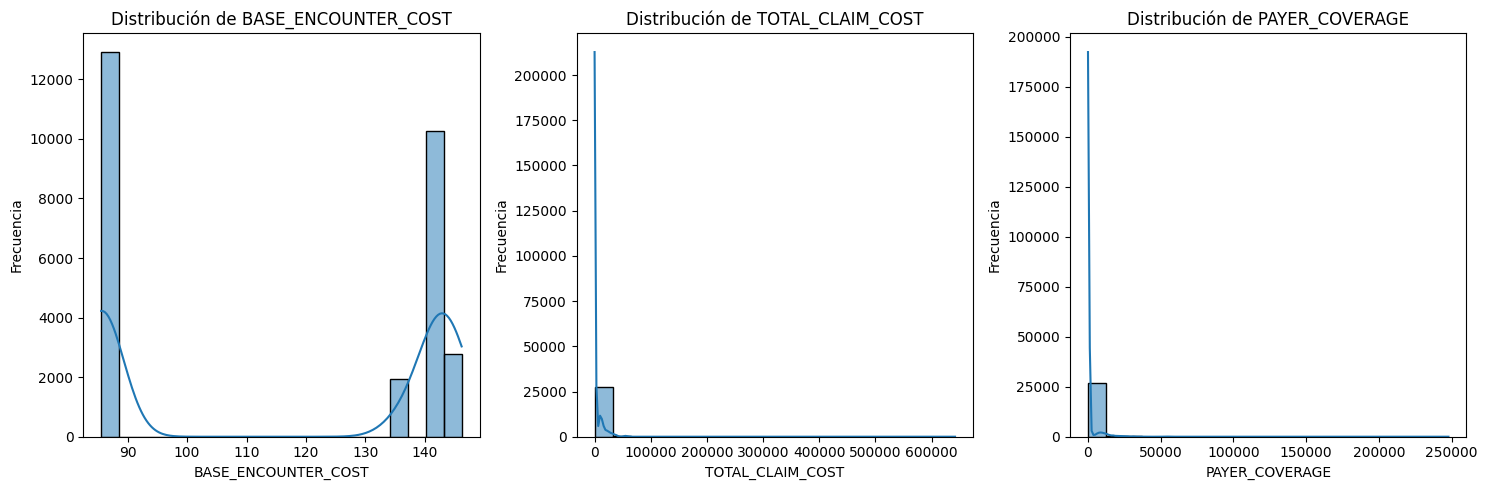

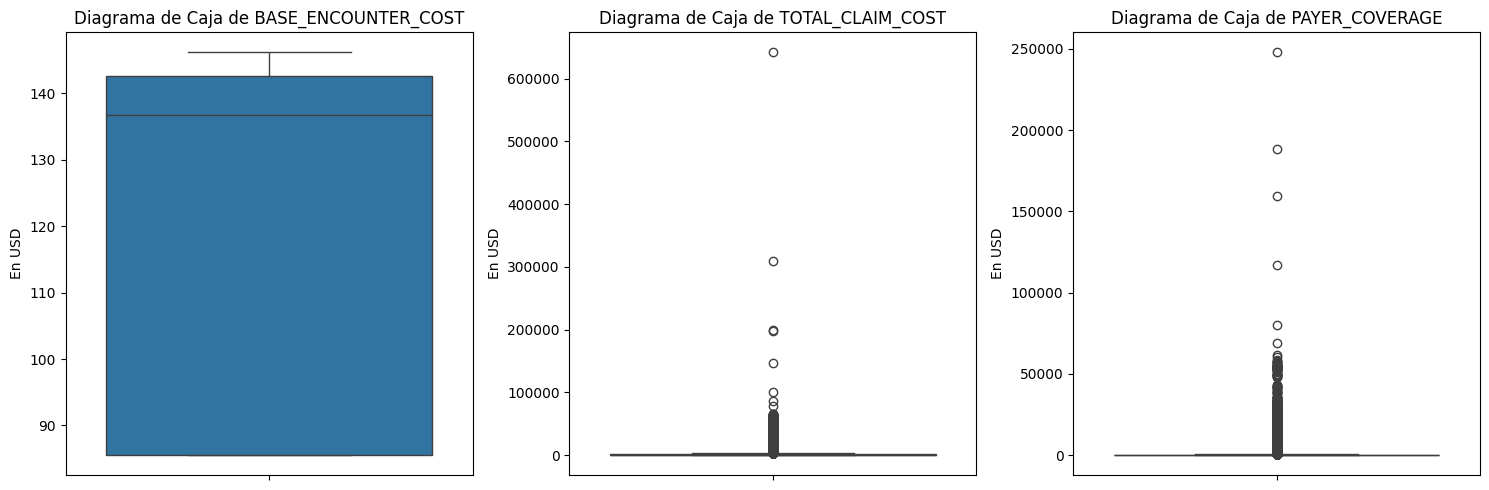

In [39]:
# ***Interpretación de las Estadísticas Descriptivas:
# Histogramas para df_encounters para ayudar a entender mas las interpretaciones, sesgos y valores atipicos

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_encounters['BASE_ENCOUNTER_COST'], bins=20,kde=True)
plt.title('Distribución de BASE_ENCOUNTER_COST')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df_encounters['TOTAL_CLAIM_COST'], bins=20, kde=True)
plt.title('Distribución de TOTAL_CLAIM_COST')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df_encounters['PAYER_COVERAGE'], bins=20, kde=True)
plt.title('Distribución de PAYER_COVERAGE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Diagrama de Cajas prar df_encounters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_encounters['BASE_ENCOUNTER_COST'])
plt.title('Diagrama de Caja de BASE_ENCOUNTER_COST')
plt.ylabel('En USD')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_encounters['TOTAL_CLAIM_COST'])
plt.title('Diagrama de Caja de TOTAL_CLAIM_COST')
plt.ylabel('En USD')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_encounters['PAYER_COVERAGE'])
plt.title('Diagrama de Caja de PAYER_COVERAGE')
plt.ylabel('En USD')

plt.tight_layout()
plt.show()




In [40]:
#Detección de valores atípicos con IQR - BASE_ENCOUNTER_COST - encounters
Q1 = df_encounters['BASE_ENCOUNTER_COST'].quantile(0.25)
Q3 = df_encounters['BASE_ENCOUNTER_COST'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_encounters[(df_encounters['BASE_ENCOUNTER_COST'] < lower_bound) | (df_encounters['BASE_ENCOUNTER_COST'] > upper_bound)]
print("Valores atípicos BASE_ENCOUNTER_COST - encounters (Método IQR):\n", outliers)

Valores atípicos BASE_ENCOUNTER_COST - encounters (Método IQR):
 Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PAYER, ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, TOTAL_CLAIM_COST, PAYER_COVERAGE, REASONCODE, REASONDESCRIPTION]
Index: []


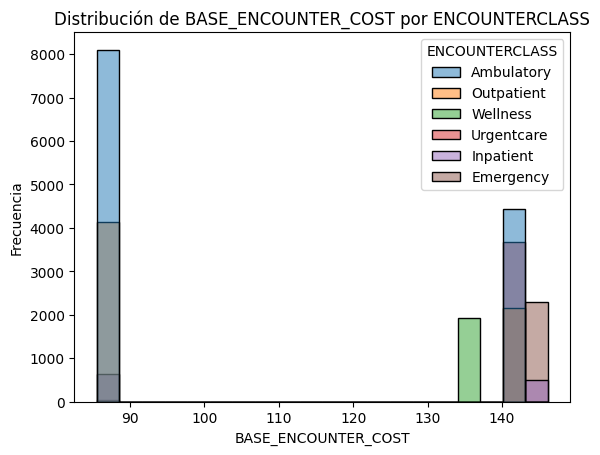

'\n#Se nota en el grafico que no hay clasificacion de base de costo del encuentro de acuerdo a la variable ENCOUNTERCLASS\n'

In [41]:
# Interpretacion
"""
- BASE_ENCOUNTER_COST: Esta variable parece tener una distribución bastante uniforme con dos valores predominantes;
  no se detecta valores atipicos
"""
# Histograma que muestra la distribuciones de datos  de la columna BASE_ENCOUNTER_COST en base a ENCOUNTERCLASS
sns.histplot(data=df_encounters, x='BASE_ENCOUNTER_COST', bins=20, hue='ENCOUNTERCLASS')
plt.title('Distribución de BASE_ENCOUNTER_COST por ENCOUNTERCLASS')
plt.xlabel('BASE_ENCOUNTER_COST')
plt.ylabel('Frecuencia')
plt.show()

"""
#Se nota en el grafico que no hay clasificacion de base de costo del encuentro de acuerdo a la variable ENCOUNTERCLASS
"""


In [42]:
#Detección de valores atípicos con IQR - TOTAL_CLAIM_COST - encounters
Q1 = df_encounters['TOTAL_CLAIM_COST'].quantile(0.25)
Q3 = df_encounters['TOTAL_CLAIM_COST'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_encounters[(df_encounters['TOTAL_CLAIM_COST'] < lower_bound) | (df_encounters['TOTAL_CLAIM_COST'] > upper_bound)]
print("Valores atípicos TOTAL_CLAIM_COST - encounters (Método IQR):\n", outliers)


"""
TOTAL_CLAIM_COST: Esta variable muestra una gran dispersión y está fuertemente sesgada a la derecha.
Hay muchos valores atípicos, lo que indica que algunos reclamos son mucho más altos que la mayoría
"""

Valores atípicos TOTAL_CLAIM_COST - encounters (Método IQR):
                                          Id                     START  \
6      c140ed81-040e-8319-e860-f72b4738ed22 2011-01-03 22:39:50+00:00   
7      2cfd4ddd-ad13-fe1e-528b-15051cea2ec3 2011-01-04 14:49:55+00:00   
9      17966936-0878-f4db-128b-a43ae10d0878 2011-01-05 04:02:09+00:00   
14     4b6a38e6-7df9-2d75-d850-6bd662f3d05b 2011-01-07 21:02:09+00:00   
15     cc36dc26-6019-94a5-93b7-7bbf312e6fc4 2011-01-07 22:39:45+00:00   
...                                     ...                       ...   
27874  85ede31b-10c4-178d-e479-4a0c3f52d6f0 2022-01-26 16:58:48+00:00   
27881  93cfd731-2064-3346-8c93-2d0f442a0e9b 2022-01-28 07:13:29+00:00   
27882  cbc4aa02-ff77-81e6-e181-c49607258ad6 2022-01-28 13:12:16+00:00   
27887  07710480-9d6b-9c9b-87c3-c1d54df4069d 2022-01-29 20:12:53+00:00   
27888  01b57f06-cebe-a3e4-4423-a796ffb0c35d 2022-01-29 20:35:37+00:00   

                           STOP                              

'\nTOTAL_CLAIM_COST: Esta variable muestra una gran dispersión y está fuertemente sesgada a la derecha.\nHay muchos valores atípicos, lo que indica que algunos reclamos son mucho más altos que la mayoría\n'

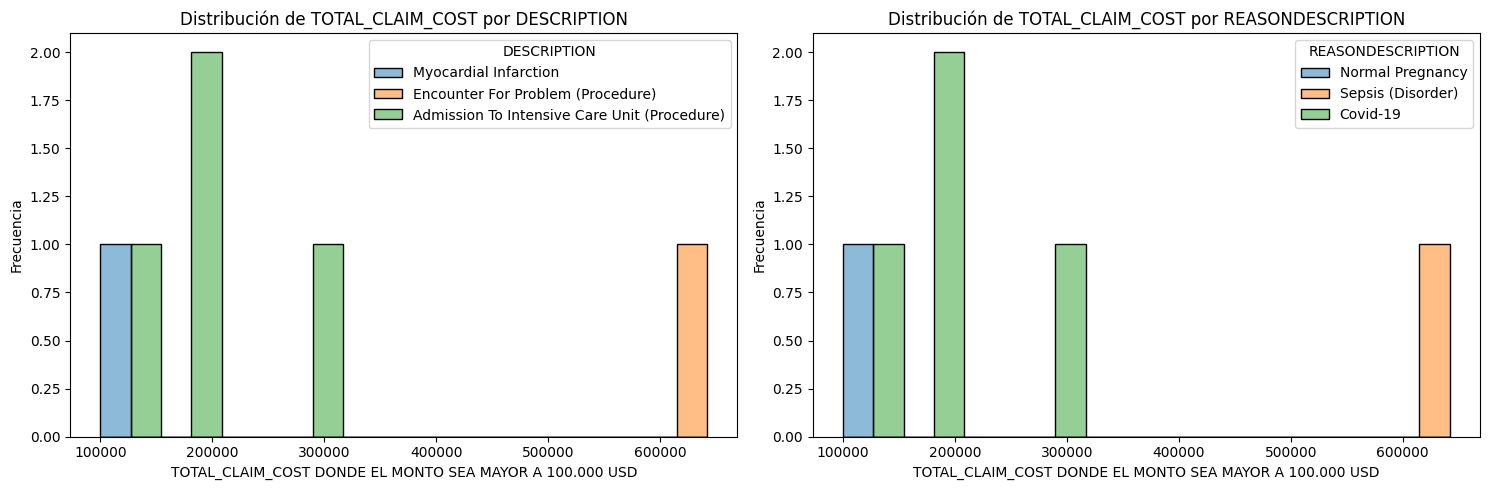

In [43]:
# Histograma que muestra la distribuciones de datos  de la columna TOTAL_CLAIM_COST en base a DESCRIPTION
"""
sns.histplot(data=df_encounters.query('TOTAL_CLAIM_COST > 100000'), x='TOTAL_CLAIM_COST', bins=20, hue='DESCRIPTION')
plt.title('Distribución de TOTAL_CLAIM_COST por DESCRIPTION')
plt.xlabel('TOTAL_CLAIM_COST DONDE EL MONTO SEA MAYOR A 100.000 USD')
plt.ylabel('Frecuencia')
plt.show()
"""

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_encounters.query('TOTAL_CLAIM_COST > 100000'), x='TOTAL_CLAIM_COST', bins=20, hue='DESCRIPTION')
plt.title('Distribución de TOTAL_CLAIM_COST por DESCRIPTION')
plt.xlabel('TOTAL_CLAIM_COST DONDE EL MONTO SEA MAYOR A 100.000 USD')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data=df_encounters.query('TOTAL_CLAIM_COST > 100000'), x='TOTAL_CLAIM_COST', bins=20, hue='REASONDESCRIPTION')
plt.title('Distribución de TOTAL_CLAIM_COST por REASONDESCRIPTION')
plt.xlabel('TOTAL_CLAIM_COST DONDE EL MONTO SEA MAYOR A 100.000 USD')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

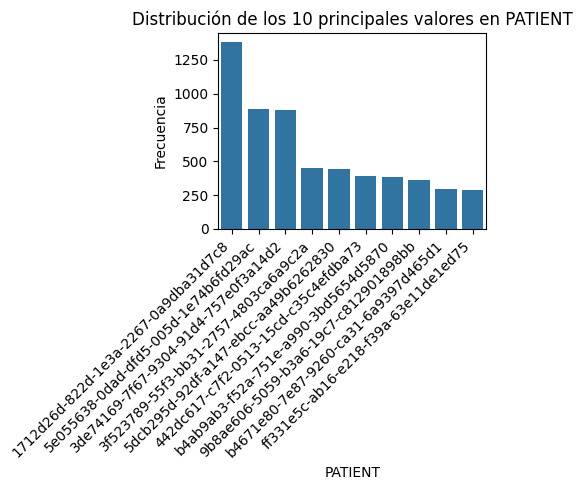

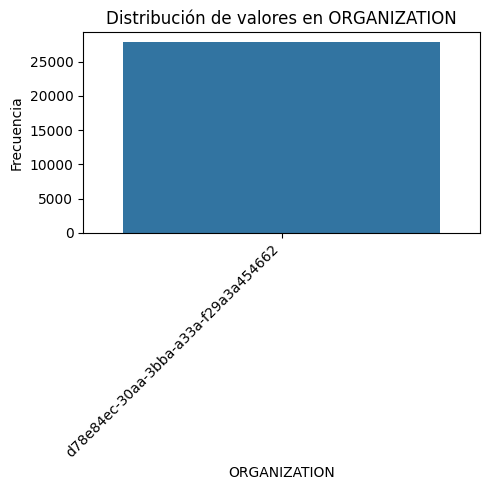

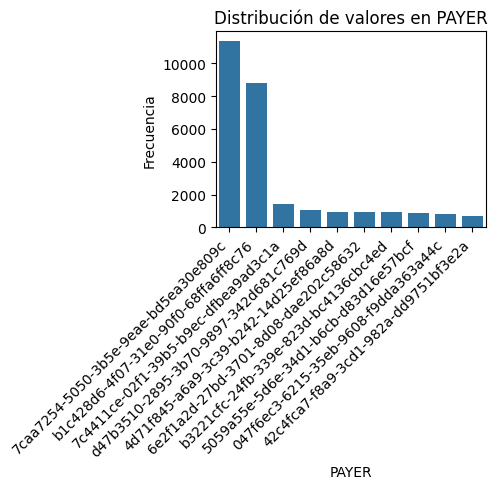

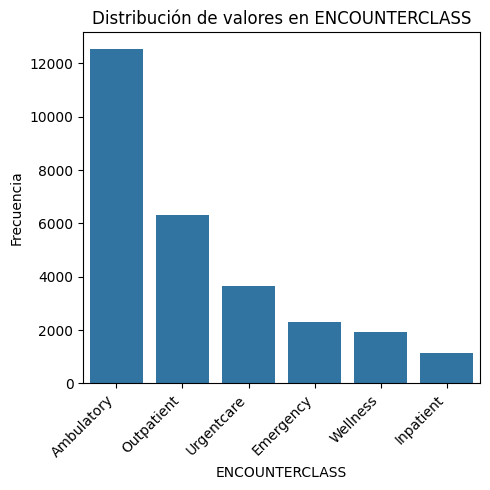

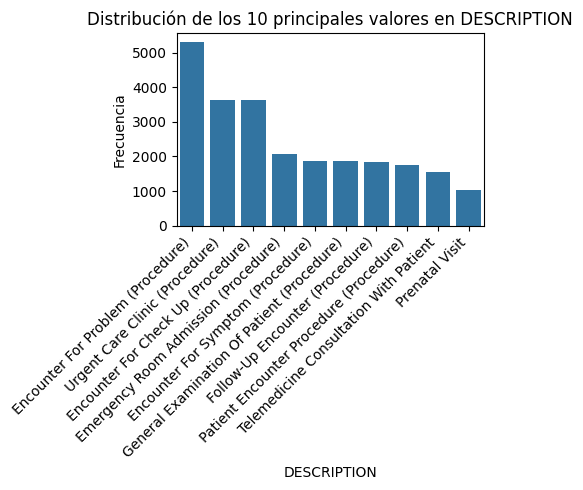

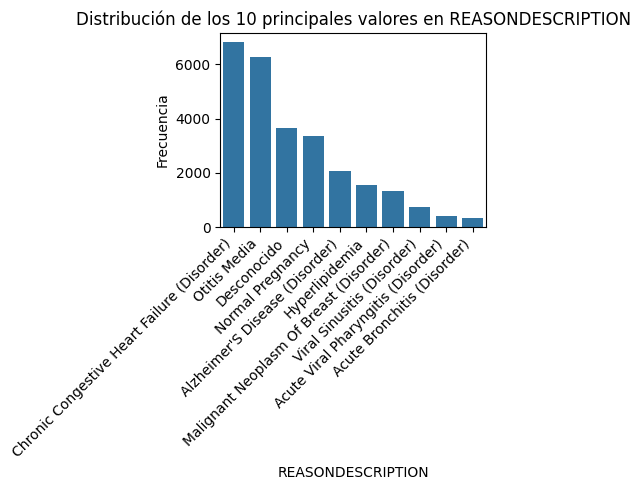

In [44]:
"""
***Conclusiones e Interpretación variables categoricas relevantes:***

****(PATIENT):****

Alta Variabilidad de Pacientes:
  Los datos muestran una gran cantidad de pacientes únicos, con los 10 principales representando solo una pequeña
  fracción del total de encuentros.

Paciente Dominante:
  El paciente con el ID '1712d26d-822d-1e3a-2267-0a9dba31d7c8' tiene una frecuencia significativamente mayor que otros,
  lo que sugiere que este paciente ha tenido muchas más interacciones con el sistema de salud en comparación con el resto.

Distribución de Frecuencia:
  La distribución de encuentros por paciente es muy desigual, con una cola larga donde la mayoría de los pacientes tienen pocos encuentros.
  Esto es típico en los datos de atención médica, donde algunos pacientes con afecciones crónicas o necesidades de atención frecuentes
  acumulan más visitas.


****(ENCOUNTERCLASS):****

Predominio de Encuentros Ambulatorios:
  Casi el 45% de los encuentros son ambulatorios, lo que indica que la mayoría de las interacciones con el sistema de salud
  no requieren hospitalización.

Importancia de la Atención Outpatient:
  Los servicios de consulta externa representan una parte significativa de los encuentros, lo que sugiere que muchos pacientes
  reciben atención especializada o de seguimiento sin ser ingresados.

Uso de Servicios de Atención Urgente:
  La atención de urgencia es más frecuente que las visitas de emergencia, lo que indica que muchos pacientes buscan atención
  para problemas que no son emergencias potencialmente mortales pero que requieren atención oportuna.

Baja Frecuencia de Encuentros Inpatient:
  Las hospitalizaciones son relativamente raras en comparación con otros tipos de encuentros, lo que puede reflejar un enfoque
  en la atención ambulatoria y la gestión de la atención para reducir las estancias hospitalarias.

****(DESCRIPTION):****

Encuentros para Problemas y Chequeos:
  La mayoría de los encuentros se clasifican como "Encounter For Problem" o "Encounter For Check Up", lo que
  indica un enfoque en el diagnóstico y la atención preventiva.

Importancia de la Atención de Urgencia: "Urgent Care Clinic" es una categoría frecuente, lo que refleja la demanda de atención
  médica para problemas que requieren atención rápida pero no son emergencias.

Variedad de Tipos de Encuentros: Hay una variedad de tipos de encuentros, desde admisiones en la sala de emergencias hasta
  consultas de telemedicina, lo que demuestra la diversidad de servicios ofrecidos.

Seguimiento y Atención Continua:
  Los encuentros de "Follow-Up" también son comunes, lo que sugiere que una parte significativa de las interacciones
  con el sistema de salud están relacionadas con la atención continua y el manejo de afecciones crónicas.


****(REASONDESCRIPTION):****

Condiciones Crónicas Comunes:
  "Chronic Congestive Heart Failure" y "Alzheimer's Disease" están entre las razones de consulta más frecuentes,
  lo que indica una carga significativa de enfermedades crónicas en la población atendida.

Infecciones Comunes:
  "Otitis Media" y "Viral Sinusitis" también son razones frecuentes, lo que sugiere que las infecciones son una causa común de visitas médicas.

Atención Materna:
  "Normal Pregnancy" representa una proporción notable de las razones de consulta, lo que destaca la importancia de los servicios de salud materna.

Datos Desconocidos: Un número significativo de registros tiene "Desconocido" como motivo de consulta, lo que sugiere que faltan datos
o que no se registraron motivos específicos. Esto podría afectar la calidad del análisis y la toma de decisiones.

"""

#-------------------------------------------------------------------------------------------------
# df_encounters
# Histogramas
# Obtener todas las columnas categóricas
columnas_categoricas = df_encounters.select_dtypes(include=['object']).columns

# Excluir las columnas especificadas
columnas_a_excluir = ['Id']
columnas_categoricas = columnas_categoricas.drop(columnas_a_excluir, errors='ignore')

# Crear histogramas para cada columna categórica
for columna in columnas_categoricas:
  # Obtener los conteos de valores para la columna actual
  conteos = df_encounters[columna].value_counts()

  # Si hay demasiados valores únicos, mostrar solo los 10 principales
  if len(conteos) > 10:
    conteos = conteos.head(10)
    plt.figure(figsize=(5, 5))
    plt.title(f'Distribución de los 10 principales valores en {columna}')
  else:
    plt.figure(figsize=(5, 5))
    plt.title(f'Distribución de valores en {columna}')
  sns.barplot(x=conteos.index, y=conteos.values)
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para mejor legibilidad
  plt.tight_layout()
  plt.show()

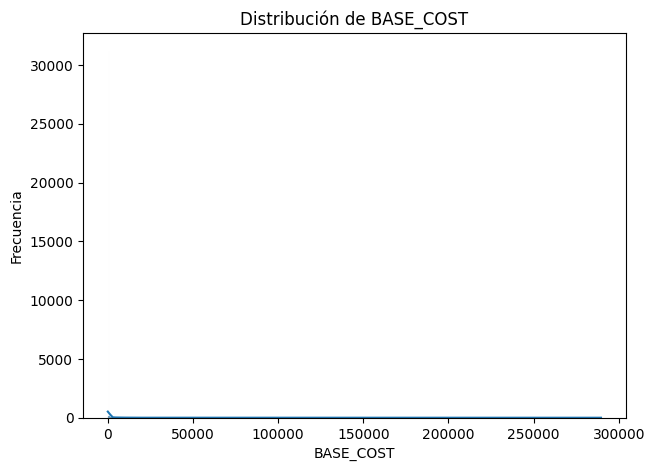

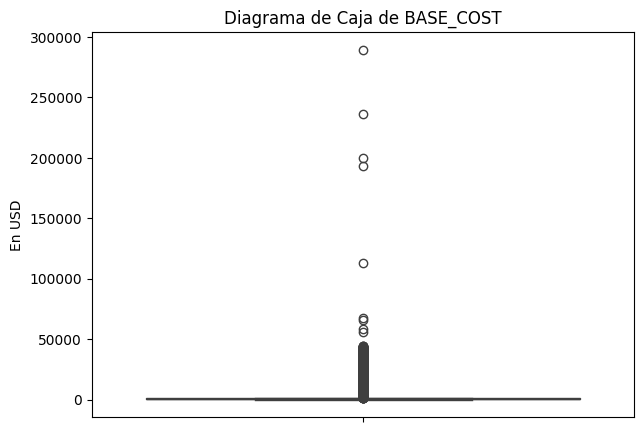

In [45]:
# Histograma para df_procedures
plt.figure(figsize=(7, 5))
sns.histplot(df_procedures['BASE_COST'], kde=True)
plt.title('Distribución de BASE_COST')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de Caja papra df_procedures
plt.figure(figsize=(7, 5))
sns.boxplot(y=df_procedures['BASE_COST'])
plt.title('Diagrama de Caja de BASE_COST')
plt.ylabel('En USD')
plt.show()

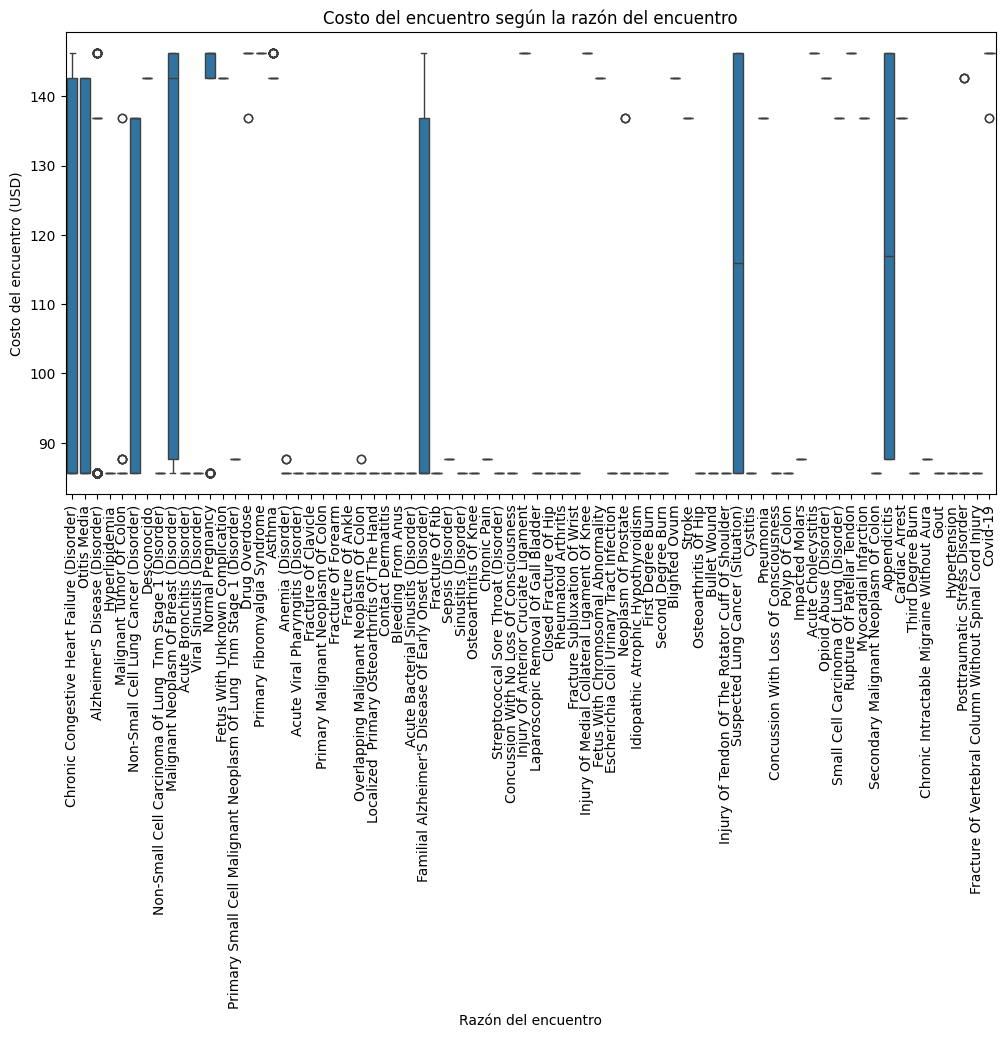

,sum_sq,df,F,PR(>F)
REASONDESCRIPTION,1.084975e+07,73.0,354.539249,0.0
Residual,1.166119e+07,27817.0,NaN,NaN


In [87]:
#-------------*****Análisis Bivariado y Multivariado*****
# Costo y Razón del Encuentro: ¿Hay diferencias en el costo según la razón del encuentro (REASONDESCRIPTION)? (Boxplot, ANOVA). Importante: Después de imputar los valores faltantes.

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova

# Imputar valores faltantes en 'BASE_ENCOUNTER_COST' (reemplazar con la media)
df_encounters['BASE_ENCOUNTER_COST'].fillna(df_encounters['BASE_ENCOUNTER_COST'].mean(), inplace=True)

# Boxplot del costo del encuentro según la razón del encuentro
plt.figure(figsize=(12, 6))
sns.boxplot(x='REASONDESCRIPTION', y='BASE_ENCOUNTER_COST', data=df_encounters)
plt.xticks(rotation=90)
plt.title('Costo del encuentro según la razón del encuentro')
plt.xlabel('Razón del encuentro')
plt.ylabel('Costo del encuentro (USD)')
plt.show()

# ANOVA para comparar la media del costo del encuentro según la razón del encuentro
model = smf.ols('BASE_ENCOUNTER_COST ~ REASONDESCRIPTION', data=df_encounters).fit()
table = anova.anova_lm(model, typ=2)
table

# Interpretación de los resultados:
# - Si el p-valor en la tabla ANOVA es menor que 0.05, se rechaza la hipótesis nula de que las medias de los costos
#   son iguales para todos los grupos de "REASONDESCRIPTION". Esto significa que hay diferencias significativas en
#   el costo del encuentro según la razón del encuentro.
# - Puedes observar la tabla ANOVA para identificar qué razones de encuentro tienen diferencias significativas en el costo.


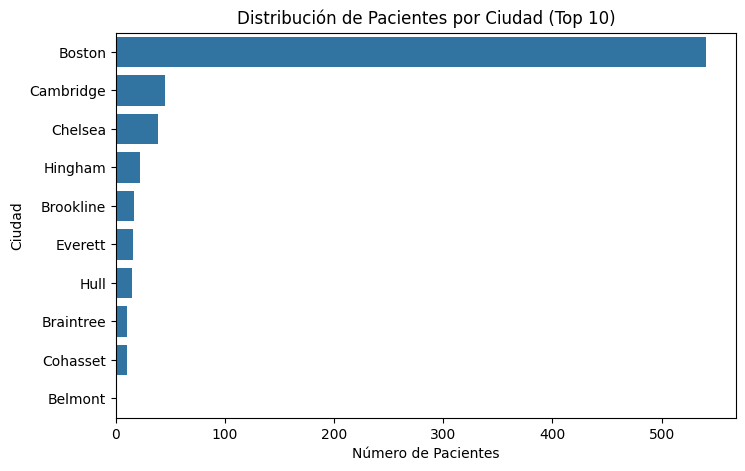

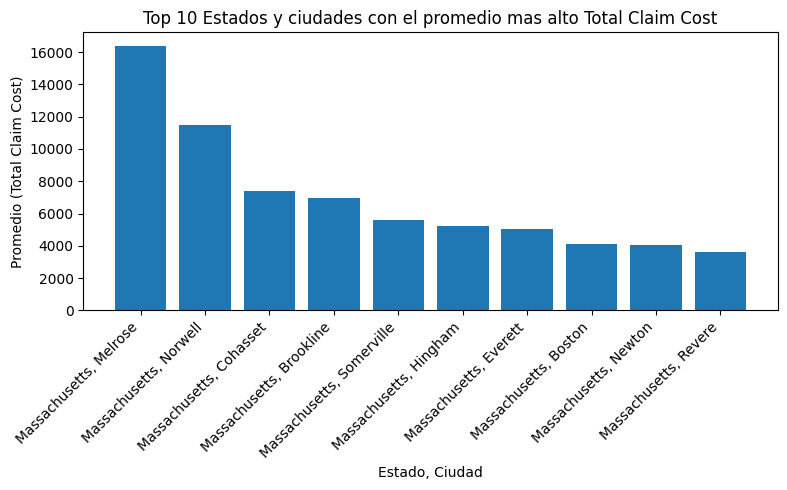

In [46]:
#------- *****Análisis por Ubicación*****
# Distribución de pacientes por ciudad/estado.

# Agrupar por 'CITY' y 'STATE' en df_patients y contar el número de pacientes
patient_distribution = df_patients.groupby(['CITY', 'STATE'])['Id'].count().reset_index(name='Numero de Pacientes')

# Ordenar los datos por el número de pacientes (top 10)
patient_distribution = patient_distribution.head(10).sort_values('Numero de Pacientes', ascending=False)

# Crear un gráfico de barras de la distribución
plt.figure(figsize=(8, 5))  # Ajustar el tamaño del gráfico según sea necesario
sns.barplot(x='Numero de Pacientes', y='CITY', data=patient_distribution)

plt.title('Distribución de Pacientes por Ciudad (Top 10)')  # Cambiar título según la visualización
plt.xlabel('Número de Pacientes')
plt.ylabel('Ciudad')
plt.show()

## generar un grafico de distribucion para observar el top 10 costo promedio por 'STATE' y 'CITY'

# Unimos df_encounters y df_patients por su relacion(FK)
merged_df = pd.merge(df_encounters, df_patients, left_on='PATIENT', right_on='Id', how='inner')

# Calculanmos el promedio de TOTAL_CLAIM_COST por estado y ciudad
promedio_claim_cost = merged_df.groupby(['STATE', 'CITY'])['TOTAL_CLAIM_COST'].mean()

# Ordenanos el top de costos
top_10_promedio_claim_cost = promedio_claim_cost.sort_values(ascending=False).head(10)

# Creamos un bar chart (Me costo un peru hacerlo)
plt.figure(figsize=(8, 5))
plt.bar(top_10_promedio_claim_cost.index.map(lambda x: f"{x[0]}, {x[1]}"), top_10_promedio_claim_cost.values)
plt.xlabel('Estado, Ciudad')
plt.ylabel('Promedio (Total Claim Cost)')
plt.title('Top 10 Estados y ciudades con el promedio mas alto Total Claim Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


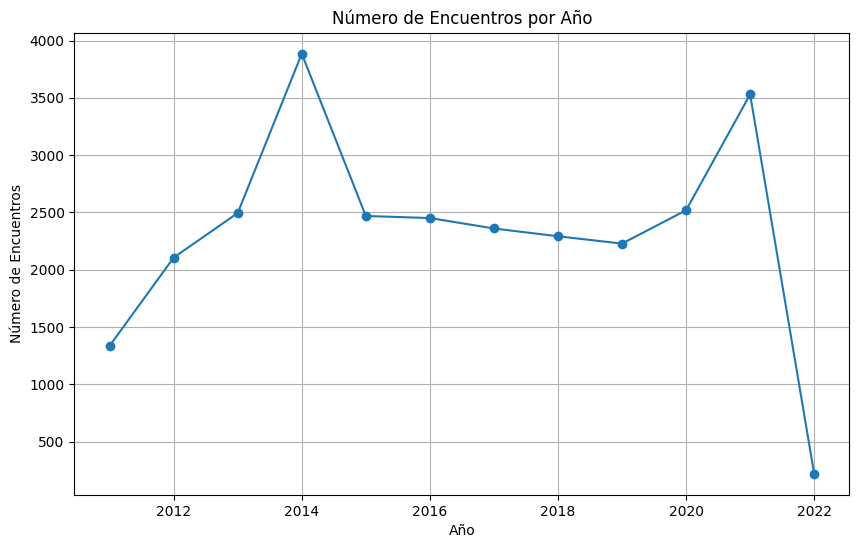

In [59]:
# -----****Análisis Temporal******
# Gráfico de línea del número de encuentros por mes/año

"""
Al final decidi realizarlo por anho ya que al agregar el mes por la cantidad de anhos
era imposible distinguir correntamente los datos.

"""

encuentros_por_ano = df_encounters.groupby([df_encounters['START'].dt.year])['Id'].count().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(encuentros_por_ano['START'], encuentros_por_ano['Id'], marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Encuentros')
plt.title('Número de Encuentros por Año')
plt.grid(True)
plt.show()

# ... (El resto de tu código) ...


In [60]:
# -----****Análisis Temporal******
# Obtener el top 5 de DESCRIPTION  de df_encounters en el ano 2014 y 2021

# Suponiendo que df_encounters es tu DataFrame
top_5_descriptions_2014 = df_encounters[df_encounters['START'].dt.year == 2014]['DESCRIPTION'].value_counts().head(5)
top_5_descriptions_2021 = df_encounters[df_encounters['START'].dt.year == 2021]['DESCRIPTION'].value_counts().head(5)

print("Top 5 descripciones en 2014:")
print(top_5_descriptions_2014.to_markdown())

print("\nTop 5 descripciones en 2021:")
print(top_5_descriptions_2021.to_markdown())


"""Al realizar el analisis temporal de los picos en el anho 2014 y 2021 se nota que en 2014 se tuvo 1103
encuentros por procedimentos de pacientes y en el 2021 el tipo se a la administracion de vacuna, en epoca de pandemia"""


Top 5 descripciones en 2014:
| DESCRIPTION                             |   count |
|:----------------------------------------|--------:|
| Patient Encounter Procedure (Procedure) |    1103 |
| Encounter For Problem (Procedure)       |     699 |
| Follow-Up Encounter (Procedure)         |     354 |
| Encounter For Check Up (Procedure)      |     354 |
| Urgent Care Clinic (Procedure)          |     320 |

Top 5 descripciones en 2021:
| DESCRIPTION                                                      |   count |
|:-----------------------------------------------------------------|--------:|
| Administration Of Vaccine To Produce Active Immunity (Procedure) |    1001 |
| Encounter For Problem (Procedure)                                |     521 |
| Urgent Care Clinic (Procedure)                                   |     375 |
| Telemedicine Consultation With Patient                           |     338 |
| Encounter For Check Up (Procedure)                               |     323 |


'Al realizar el analisis temporal de los picos en el anho 2014 y 2021 se nota que en 2014 se tuvo 1103\nencuentros por procedimentos de pacientes y en el 2021 el tipo se a la administracion de vacuna, en epoca de pandemia'

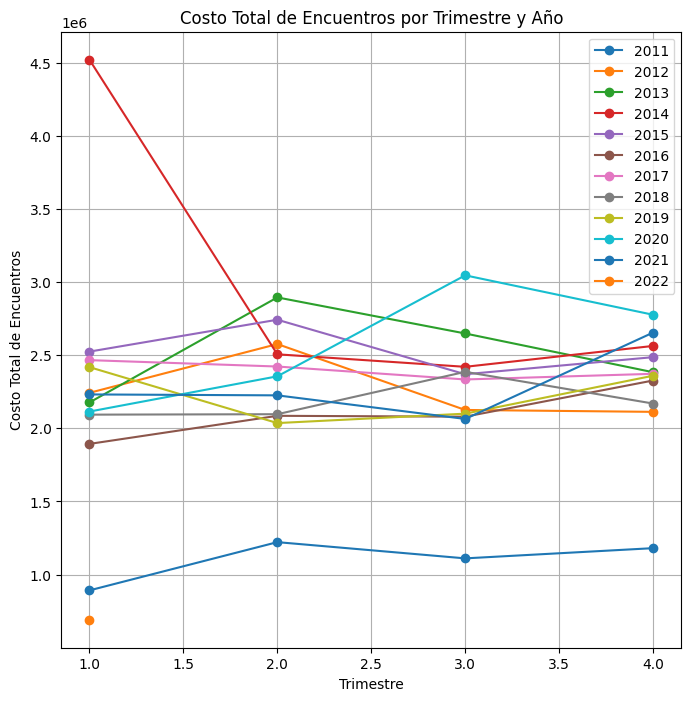

In [81]:
# -----****Análisis Temporal******
# Gráfico de línea del costo total de los encuentros por trimestre/año

df_encounters_anho_trimestre = df_encounters.copy()

# Crear una nueva columna 'Trimestre'
df_encounters_anho_trimestre['Trimestre'] = df_encounters_anho_trimestre['START'].dt.quarter


# Agrupar por año y trimestre, y calcular la suma del costo total
costo_por_trimestre = df_encounters_anho_trimestre.groupby([df_encounters_anho_trimestre['START'].dt.year, 'Trimestre'])['TOTAL_CLAIM_COST'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 8))
for year in costo_por_trimestre['START'].unique():
    data_year = costo_por_trimestre[costo_por_trimestre['START'] == year]
    plt.plot(data_year['Trimestre'], data_year['TOTAL_CLAIM_COST'], marker='o', label=str(year))

plt.xlabel('Trimestre')
plt.ylabel('Costo Total de Encuentros')
plt.title('Costo Total de Encuentros por Trimestre y Año')
plt.grid(True)
plt.legend()
plt.show()


In [84]:
"""
Para entender el grafico se desglozamos los datos y encontramos que el costo
tambien aumento en nocion a la cantidad de encuentos en el mismo anho de aumentos de encuentros
"""
costo_por_trimestre



,START,Trimestre,TOTAL_CLAIM_COST
0,2011,1,892148.63
1,2011,2,1221970.76
2,2011,3,1110997.41
3,2011,4,1180819.93
4,2012,1,2243048.87
5,2012,2,2576512.08
6,2012,3,2125871.06
7,2012,4,2112882.09
8,2013,1,2177137.49
9,2013,2,2895445.13
